# Курсовая работа. Блок 1
*Pandas и Matplotlib*

[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## 1. Описание и начальная работа с данными

Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [2]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
5,a387ab916f402cb3fbfffd29f68fd0ce,2,1,done,2018-06-23 08:18:07.476199+00,2018-06-23 08:18:09.552181+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False
6,a387ab916f402cb3fbfffd29f68fd0ce,1,3,done,2018-06-20 15:58:22.132468+00,2018-06-20 16:00:06.127191+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00,NaN,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True
8,a387ab916f402cb3fbfffd29f68fd0ce,1,2,done,2018-06-20 15:45:07.976223+00,2018-06-20 15:58:21.886722+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False
9,a387ab916f402cb3fbfffd29f68fd0ce,1,5,done,2018-06-21 19:09:31.117521+00,2018-06-21 19:10:36.707919+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False


In [1]:
# 1. Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
%matplotlib inline

In [2]:
# 1. Загрузим данные из файлов csv в датафеймы
# 2. Проверим инфо по всем датафреймам
# 3. Из датафейма из файла courses.csv удалим столбец без имени с порядковыми номерами, он же нам не нужен
df_courses = pd.read_csv('courses.csv', encoding='UTF-8')
df_course_contents = pd.read_csv('course_contents.csv', encoding='UTF-8')
df_progresses = pd.read_csv('progresses.csv', encoding='UTF-8')
df_progress_phases = pd.read_csv('progress_phases.csv', encoding='UTF-8')
df_courses.info()
df_course_contents.info()
df_progresses.info()
df_progress_phases.info()
del df_courses['Unnamed: 0']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
Unnamed: 0    15 non-null int64
id            15 non-null object
title         15 non-null object
field         15 non-null object
dtypes: int64(1), object(3)
memory usage: 560.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 8 columns):
course_id        1201 non-null object
module_number    1201 non-null int64
module_title     1201 non-null object
lesson_number    1201 non-null int64
lesson_title     1201 non-null object
lesson_token     1201 non-null object
is_video         1201 non-null bool
is_homework      1201 non-null bool
dtypes: bool(2), int64(2), object(4)
memory usage: 58.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15934 entries, 0 to 15933
Data columns (total 3 columns):
id            15934 non-null object
student_id    15934 non-null object
course_id     15934 non-null object
dtypes: object(3)
memory usage: 

In [3]:
# 1. Объединим датафрейм прогресса студентов с датафреймом названий курсов 
# 2. Удалим лишний столбец 'id_y', он дублирует данные столбца progress_id
# 3. Переименуем столбцы
df_merge_1 = pd.merge(left=df_progresses, right=df_courses, left_on='course_id', right_on='id')
del df_merge_1['id_y']
df_merge_1.rename(columns={'id_x' : 'progress_id', 'title' : 'course_title', 'field' : 'course_field'}, inplace=True)
df_merge_1.info()
df_merge_1.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15934 entries, 0 to 15933
Data columns (total 5 columns):
progress_id     15934 non-null object
student_id      15934 non-null object
course_id       15934 non-null object
course_title    15934 non-null object
course_field    15934 non-null object
dtypes: object(5)
memory usage: 746.9+ KB


,progress_id,student_id,course_id,course_title,course_field
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
1,cc5799c97826d79ac3ede2791daac00e,9dfc270466449081a82b19afd5fd44f4,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
2,301ff6dab40cf9608b861ae8f45b1480,b7fc6e2bb5f5a8ad10a0c35e834f38b2,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
3,287a0ef515f4011877f559b8b25e0023,12f268f55937f8944e581af9cd410817,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
4,3bbf34024ef5e73a38e720f009fa1480,d6252c6255d5b535635402eecc48eb2a,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business


In [4]:
# 1. Объединяем датафрейм по фазам прогресса с объединенным на прошлом этапе датафреймом
# 2. Распечатываем инфо и начало объединенного датафрейма
df_merge_2 = pd.merge(left=df_progress_phases, right=df_merge_1, left_on='progress_id', right_on='progress_id')
df_merge_2.info()
df_merge_2.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 10 columns):
progress_id      350677 non-null object
module_number    350677 non-null int64
lesson_number    350677 non-null int64
status           350677 non-null object
start_date       350677 non-null object
finish_date      334508 non-null object
student_id       350677 non-null object
course_id        350677 non-null object
course_title     350677 non-null object
course_field     350677 non-null object
dtypes: int64(2), object(8)
memory usage: 29.4+ MB


,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design


In [5]:
# 1. Объединяем датафреймы df_merge_1 и df_merge_2 по столбцам с id курса, номером модуля и номером урока
# 2. Распечатываем инфо и начало объединенного датафрейма
df_main = pd.merge(left=df_merge_2, right=df_course_contents, left_on=['course_id', 'module_number', 'lesson_number'], 
                   right_on=['course_id', 'module_number', 'lesson_number'])
df_main.info()
#df_main.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
progress_id      350677 non-null object
module_number    350677 non-null int64
lesson_number    350677 non-null int64
status           350677 non-null object
start_date       350677 non-null object
finish_date      334508 non-null object
student_id       350677 non-null object
course_id        350677 non-null object
course_title     350677 non-null object
course_field     350677 non-null object
module_title     350677 non-null object
lesson_title     350677 non-null object
lesson_token     350677 non-null object
is_video         350677 non-null bool
is_homework      350677 non-null bool
dtypes: bool(2), int64(2), object(11)
memory usage: 38.1+ MB


In [6]:
df_main[df_main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
526,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2237,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
2788,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
3555,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
4258,a387ab916f402cb3fbfffd29f68fd0ce,2,1,done,2018-06-23 08:18:07.476199+00,2018-06-23 08:18:09.552181+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False
4830,a387ab916f402cb3fbfffd29f68fd0ce,1,3,done,2018-06-20 15:58:22.132468+00,2018-06-20 16:00:06.127191+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False
5653,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00,NaN,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True
6165,a387ab916f402cb3fbfffd29f68fd0ce,1,2,done,2018-06-20 15:45:07.976223+00,2018-06-20 15:58:21.886722+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False
7136,a387ab916f402cb3fbfffd29f68fd0ce,1,5,done,2018-06-21 19:09:31.117521+00,2018-06-21 19:10:36.707919+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False


In [7]:
# Расчет показателей:
# 1. Общее число курсов:
n_study = df_main.groupby('course_id')['course_title'].agg('count').shape[0]
print(f'Количество курсов, по которым проходит обучение: {n_study}')

# 2. Количество модулей на каждом курсе
num_modules_by_course = df_main.groupby(['course_title'])['module_number'].agg('max')
print(f'\nКоличество модулей на каждом курсе: \n{num_modules_by_course}')

Количество курсов, по которым проходит обучение: 15

Количество модулей на каждом курсе: 
course_title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64


In [8]:
# 3. Количество уроков в каждом модуле на каждом курсе
num_lessons_by_modules = df_main.groupby(['course_title', 
                                          'module_title'])['lesson_number'].agg('max').reset_index(name='counts')
num_lessons_by_modules.head()

,course_title,module_title,counts
0,Excel Базовый,Визуализация данных Excel,5
1,Excel Базовый,Основной функционал Excel,11
2,Excel Базовый,Основной функционал Excel (продолжение),7
3,Excel Базовый,Сводные таблицы Excel,5
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5


In [9]:
num_lessons_by_courses = num_lessons_by_modules.groupby('course_title')['counts'].agg('sum')
#отдельно сделала еще датафрейм по количеству уроков по курсам, он более компактный и удобный для выводов
num_lessons_by_courses

course_title
Excel Базовый                           49
Java-разработчик                       114
Java-разработчик c нуля                115
JavaScript с нуля                      119
PHP-разработчик с 0 до PRO. Часть 1     41
SMM-маркетолог от А до Я                62
UX-дизайн                               73
Анимация интерфейсов                    63
Веб-вёрстка для начинающих 2.0          55
Веб-дизайн PRO 2.0                      66
Веб-дизайн Базовый                      59
Веб-дизайн с нуля 2.0                   82
Веб-разработчик                         35
Интернет-маркетолог от Ingate          171
Руководитель digital-проектов           96
Name: counts, dtype: int64

In [10]:
# 4. Медианное количество уроков в каждом модуле на каждом курсе
median_lessons_by_modules = df_main.groupby(['course_title', 
                                             'module_title'])['lesson_number'].agg('median').reset_index(name='median')
median_lessons_by_modules.head()

,course_title,module_title,median
0,Excel Базовый,Визуализация данных Excel,3.0
1,Excel Базовый,Основной функционал Excel,5.0
2,Excel Базовый,Основной функционал Excel (продолжение),4.0
3,Excel Базовый,Сводные таблицы Excel,3.0
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,3.0


In [11]:
median_lessons_by_courses = median_lessons_by_modules.groupby('course_title').agg('median')
#отдельно сделала еще датафрейм по медианному количеству уроков по курсам, как более удобный для выводов
median_lessons_by_courses

,median
course_title,
Excel Базовый,3.00
Java-разработчик,4.00
Java-разработчик c нуля,5.00
JavaScript с нуля,3.75
PHP-разработчик с 0 до PRO. Часть 1,2.00
SMM-маркетолог от А до Я,3.00
UX-дизайн,2.00
Анимация интерфейсов,2.00
Веб-вёрстка для начинающих 2.0,4.00


In [12]:
# 5. Количество учеников на каждом курсе
num_of_students_by_course = df_main.groupby(
    ['course_title', 'course_field', 'student_id'])['student_id'].agg('count').reset_index(name='counts').groupby(
    ['course_title', 'course_field'])['student_id'].count().reset_index(name='counts')
num_of_students_by_course

,course_title,course_field,counts
0,Excel Базовый,Business,782
1,Java-разработчик,Development,763
2,Java-разработчик c нуля,Development,581
3,JavaScript с нуля,Development,966
4,PHP-разработчик с 0 до PRO. Часть 1,Development,854
5,SMM-маркетолог от А до Я,Marketing,506
6,UX-дизайн,Design,1151
7,Анимация интерфейсов,Design,598
8,Веб-вёрстка для начинающих 2.0,Development,2004
9,Веб-дизайн PRO 2.0,Design,1711


In [13]:
# 6. Минимальный, максимальный, средний, медианный возраст студентов
# 6.1 Загружаем csv-файл в датафрейм
df_students = pd.read_csv('students.csv', encoding='UTF-8')

# 6.2 Удаляем строки в датафрейме с NaN в столбце с датой рождения
df_students = df_students.dropna(subset=['birthday'])

# 6.3 Пишем функцию для преобразования даты рождения в формат datetime.date
f_date = lambda x: datetime.date(datetime.strptime(x, '%Y-%m-%d'))

# 6.3 Пишем функцию для расчета возраста -текущий год минус год рождения - 1, если день рождения в текущем году был уже
f_date_delta = lambda x: date.today().year - x.year - ((date.today().month, date.today().day) < (x.month, x.day))

# 6.4 Создаем новый столбец возраста на основании даты рождения с применением вышеуказанных функций
df_students['age'] = df_students['birthday'].apply(f_date).map(f_date_delta)

# 6.5 Проверяем полученные данные и понимаем, что данные по дате рождения введены по некоторым студентам некорректно
# (теоретически студенты должны быть трудоспособного возраста - от 16 до 65 лет)
wrong_birthday = df_students[(df_students['age']<=16) | (df_students['age']>=65)].shape[0]
print(f' Количество строк, где возраст студента не соответствует трудоспособному возрасту: {wrong_birthday}')

 Количество строк, где возраст студента не соответствует трудоспособному возрасту: 796


In [14]:
# 6.6 Создадим новый датафрейм исключив строки с неверным возрастом:
df_ages = df_students.drop(df_students[(df_students['age']<=16) | (df_students['age']>=65)].index)
# 6.7 Рассчитаем наши показатели:
min_age = df_ages['age'].min()
max_age = df_ages['age'].max()
mean_age = df_ages['age'].mean()
median_age = df_ages['age'].median()
print(f'Минимальный возраст: {min_age} \nМаксимальный возраст: {max_age} \nСредний возраст: {mean_age} \nМедианный возраст: {median_age}')

Минимальный возраст: 17 
Максимальный возраст: 64 
Средний возраст: 29.038254463020685 
Медианный возраст: 28.0


In [15]:
# 6.8 Объединяем датафрейм df_ages с полученным ранее объединенным датафреймом (прогресс и курсы)
df_stud_by_courses = pd.merge(left=df_merge_1, right=df_ages, left_on='student_id', right_on='id')
# 6.9 Рассчитываем показатели:
df_stud_by_courses.groupby('course_title')['age'].agg(['min','max', 'median', 'mean'])

,min,max,median,mean
course_title,,,,
Excel Базовый,17,60,33.0,33.299248
Java-разработчик,17,64,28.0,29.312966
Java-разработчик c нуля,17,54,29.0,29.502646
JavaScript с нуля,17,59,28.0,28.406423
PHP-разработчик с 0 до PRO. Часть 1,17,59,28.0,29.251263
SMM-маркетолог от А до Я,17,51,28.0,28.668008
UX-дизайн,17,57,29.0,29.836858
Анимация интерфейсов,17,50,29.0,29.362101
Веб-вёрстка для начинающих 2.0,17,59,27.5,28.451744


In [16]:
# 7. Построим bar-chart, отражающий количество студентов на каждом курсе
# 7.1 Возьмем ранее созданный датафрейм
num_of_students_by_course

,course_title,course_field,counts
0,Excel Базовый,Business,782
1,Java-разработчик,Development,763
2,Java-разработчик c нуля,Development,581
3,JavaScript с нуля,Development,966
4,PHP-разработчик с 0 до PRO. Часть 1,Development,854
5,SMM-маркетолог от А до Я,Marketing,506
6,UX-дизайн,Design,1151
7,Анимация интерфейсов,Design,598
8,Веб-вёрстка для начинающих 2.0,Development,2004
9,Веб-дизайн PRO 2.0,Design,1711


([<matplotlib.axis.XTick at 0x18dcfe545f8>,
 <a list of 15 Text xticklabel objects>)

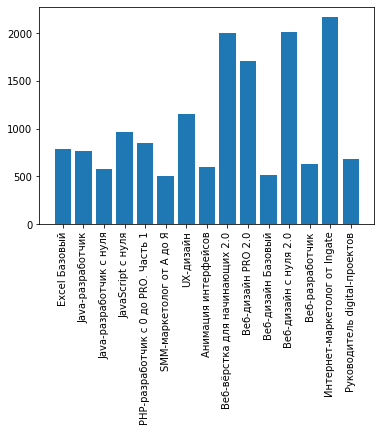

In [17]:
# 7.2 Создадим холст, нарисуем график, зададим названия оси x
fig, subplot = plt.subplots()
subplot.bar(num_of_students_by_course['course_title'].values, num_of_students_by_course['counts'].values)
plt.xticks(num_of_students_by_course['course_title'], rotation='vertical', labels = num_of_students_by_course['course_title'])

In [18]:
# 8. Постройте горизонтальный barh-chart (количество студентов на каждом курсе).
# 8.1 Сортируем ранее созданный датафрейм с числом студентов по курсам:
num_of_students_by_course.sort_values('counts', inplace=True)
num_of_students_by_course

,course_title,course_field,counts
5,SMM-маркетолог от А до Я,Marketing,506
10,Веб-дизайн Базовый,Design,518
2,Java-разработчик c нуля,Development,581
7,Анимация интерфейсов,Design,598
12,Веб-разработчик,Development,628
14,Руководитель digital-проектов,Business,685
1,Java-разработчик,Development,763
0,Excel Базовый,Business,782
4,PHP-разработчик с 0 до PRO. Часть 1,Development,854
3,JavaScript с нуля,Development,966


In [19]:
# 8.2 Создаем список со сферами к которым относится курс из столбца сгруппированного по сферам датафрейма
df_fields = num_of_students_by_course.groupby(['course_field'])['counts'].size().reset_index(name='counts')
fields_list = list(df_fields['course_field'])
fields_list
# 8.3 В цикле создаем список цветов, соответствующих сферам к которым относятся наши курсы 
n = 0
colors = ['b', 'g', 'm', 'c']
colors_list = []
for index in num_of_students_by_course['course_field']:
    for field in fields_list:
        if index == field:
            colors_list.append(colors[n])
        n += 1
    n = 0
print(colors_list)
# 8.4 Добавляем полученный список цветов в новый столбец нашего датафрейма     
num_of_students_by_course['colors'] = colors_list
num_of_students_by_course

['c', 'g', 'm', 'g', 'm', 'b', 'm', 'b', 'm', 'm', 'g', 'g', 'm', 'g', 'c']


,course_title,course_field,counts,colors
5,SMM-маркетолог от А до Я,Marketing,506,c
10,Веб-дизайн Базовый,Design,518,g
2,Java-разработчик c нуля,Development,581,m
7,Анимация интерфейсов,Design,598,g
12,Веб-разработчик,Development,628,m
14,Руководитель digital-проектов,Business,685,b
1,Java-разработчик,Development,763,m
0,Excel Базовый,Business,782,b
4,PHP-разработчик с 0 до PRO. Часть 1,Development,854,m
3,JavaScript с нуля,Development,966,m


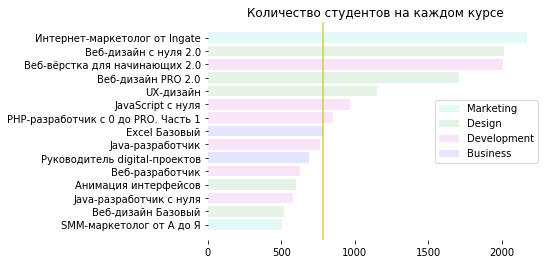

In [87]:
# 8.5 В цикле рисуем каждый столбик bar-chart (с цветами из нового столбца, устанавливаем прозрачность)
# и добавляем label легенды, так чтобы сферы не повторялись
fig, subplot = plt.subplots()
field_list = []
for index, row in num_of_students_by_course.iterrows():
    if row['course_field'] in field_list: #здесь проверяем, чтобы в легенде сферы не повторялись несколько раз
        subplot.barh([row['course_title']], [row['counts']], color=[row['colors']], alpha=0.1)
    else:
        field_list.append(row['course_field'])
        label = row['course_field']
        subplot.barh([row['course_title']], [row['counts']], color=[row['colors']], alpha=0.1, label=label)

# 9.5 Устанавливаем заголовок и легенду
subplot.set_title('Количество студентов на каждом курсе')
plt.legend(loc="center right")

# 9.6 Наносим линию медианы, задаем ее цвет. 
subplot.axvline(x=num_of_students_by_course['counts'].median(), color='y', alpha=0.7)

#9.7 Удаляем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Нашла этот код в интернете, он работает, но как я не поняла, буду благодарна, если разъясните в чем суть
# или подскажите как решить по другому.


### Выводы по полученным показателям:

1. Всего в школе 15 курсов. Самый объемный курс по количеству уроков - "Интернет-маркетолог от Ingate" (171 урок в 18 модулях), также к объемным курсам можно отнести все три имеющихся курса по Java. Самыми "короткими" являются курсы "Веб-разработчик" (35 уроков в 20 модулях) и "PHP-разработчик" (41  урок в 8 модулях).

2. К наиболее популярным (многочисленным) курсам относятся курсы: "Интернет-маркетолог от Ingate" (2168 студентов), Веб-дизайн с нуля 2.0 (2014 студентов), "Веб-вёрстка для начинающих 2.0" (2004 студента), "Веб-дизайн PRO 2.0" (1711 студентов). К менее востребованным (малочисленным) курсам можно отнести: "SMM-маркетолог от А до Я" (506 студентов), "Веб-дизайн Базовый" (518 студентов) "Java-разработчик c нуля" (568 студентов).

3. Возраст студентов в зависимости от курса сравнительно одинаков. Можно сказать, что наиболее возрастные студенты учатся на курсе "Excel Базовый", медианный возраст здесь сотавляет 33 года. Также более взрослые студенты учатся на курсах "Руководитель digital-проектов" и "Интернет-маркетолог от Ingate" (медианный возраст - 31 и 30 лет соответственно). Остальные курсы довольно ровные по возрастному составу, наименьший показатель среднего возраста отмечается на курсах "Веб-дизайн с нуля 2" и "Веб разработчик" - 27,9 лет. В целом прослеживается прямая связь между возрастом студентов и спецификой курса. Наиболее молодые - учатся на базовых курсах (с нуля, за исключением курса по Excel, что вероятно связано с хорошей подготовкой по Excel в современнх школах и ВУЗах), более возрастные - на продвинутых и более сложных курсах.

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [21]:
# 1. Рассчитаем прирост студентов на каждом курсе в каждом месяце
# 1.1 Напишим функцию, которая в цикле преобразует переменную в формат datetime и меняет все дни на 1-е число,
# поскольку мы будем работать по месяцам и дни месяца не имеют значения

def f_to_datetime(x):
    x = str(x)
    x = datetime.strptime(x.replace(x[x.find(' '):], ''), '%Y-%m-%d')
    x = datetime(x.year, x.month, 1)
    return x
    
# 1.2 Применяем функцию на столбец с датой начала
df_main['start_date'] = df_main['start_date'].apply(f_to_datetime)

In [22]:
# 1.3 Сохраним в новый датафрейм сгруппированный основной датафрейм (выбираем строки с домашним заданием,
# группируем по столбцам с названием курса и id студентов, находим самый первый урок в самом первом модуле с дом. заданием -
# функция min), группируем второй раз по курсу и дате старта, подсчитываем количество студентов, начавших выполнение
# первого дом. задания
df_growth = df_main[df_main['is_homework'] == True].groupby([
    'course_title', 'student_id'])['module_number', 'lesson_number', 'start_date'].agg('min').groupby(
    ['course_title', 'start_date'])['start_date'].agg('count').reset_index(name='growth')

# 1.4 Назначаем именами строк столбец с датой для последующей работы с функцией resample
df_growth.index = df_growth['start_date']
df_growth.head()

,course_title,start_date,growth
start_date,,,
2018-02-01,Excel Базовый,2018-02-01,6
2018-03-01,Excel Базовый,2018-03-01,3
2018-05-01,Excel Базовый,2018-05-01,3
2018-06-01,Excel Базовый,2018-06-01,9
2018-07-01,Excel Базовый,2018-07-01,13


In [23]:
#посчитаем медианный прирост студентов на каждом курсе для выводов
df_growth.groupby('course_title')['growth'].agg('median').reset_index(name='median_growth').sort_values('median_growth')

,course_title,median_growth
10,Веб-дизайн Базовый,7.5
12,Веб-разработчик,9.0
7,Анимация интерфейсов,15.0
4,PHP-разработчик с 0 до PRO. Часть 1,27.0
1,Java-разработчик,29.0
14,Руководитель digital-проектов,30.0
0,Excel Базовый,33.0
3,JavaScript с нуля,34.0
6,UX-дизайн,40.0
5,SMM-маркетолог от А до Я,42.0


In [24]:
#посчитаем медианный прирост студентов по всем курсам для выводов
df_growth.growth.median()

35.0

In [25]:
# 1.5 Удаляем столбец start date
del df_growth['start_date']
df_growth.head()

,course_title,growth
start_date,,
2018-02-01,Excel Базовый,6
2018-03-01,Excel Базовый,3
2018-05-01,Excel Базовый,3
2018-06-01,Excel Базовый,9
2018-07-01,Excel Базовый,13


In [26]:
# 1.6 Создадим список названий всех наших курсов
names = list(df_courses['title'])
# 1.7 Сортируем названия строк (наши даты) по каждому курсу в цикле, для работы с функцией resample
for name in names:
    df_growth.sort_index()

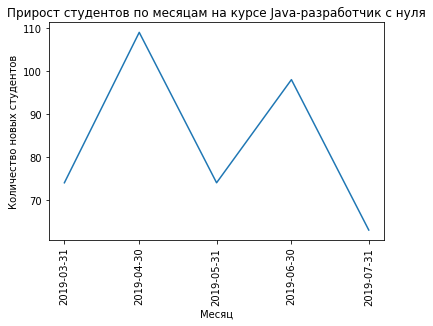

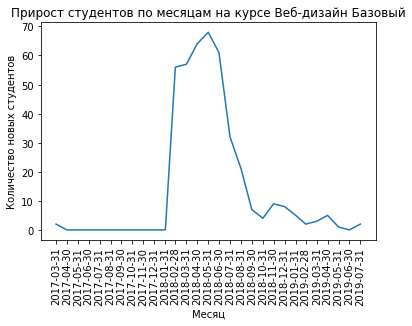

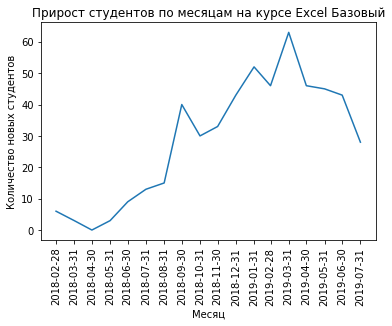

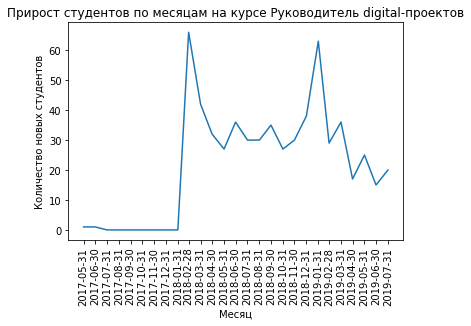

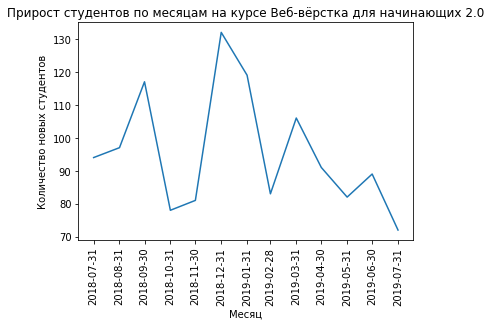

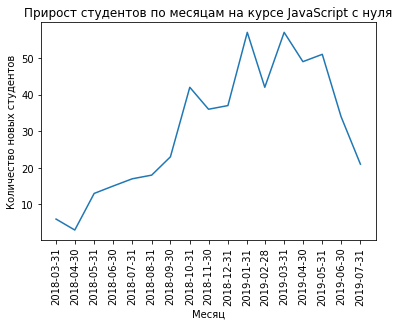

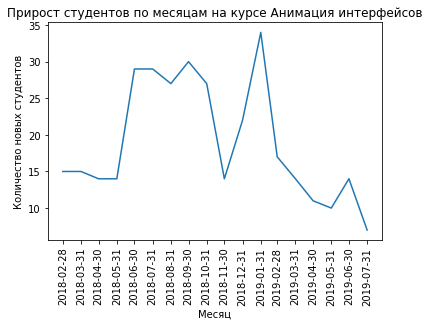

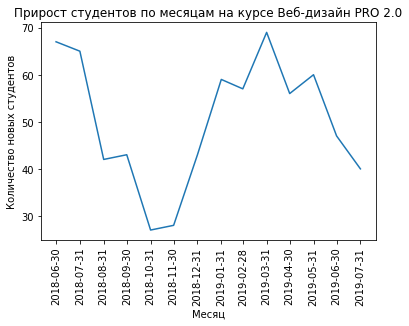

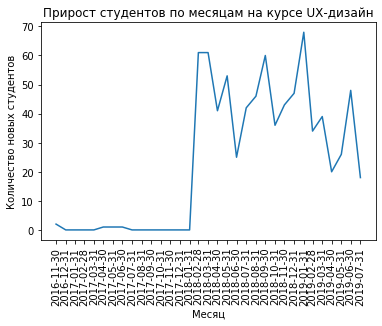

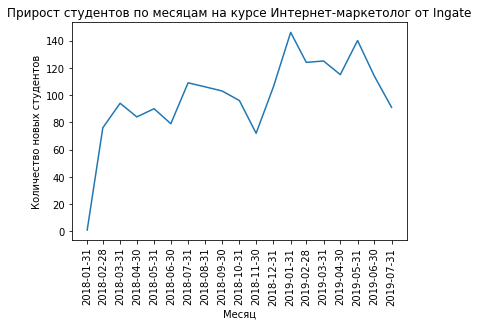

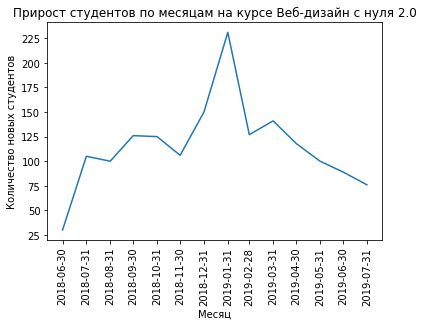

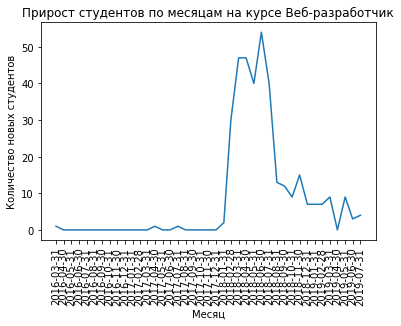

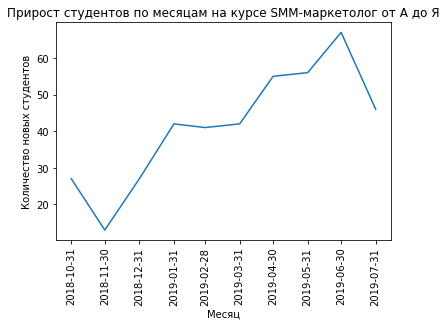

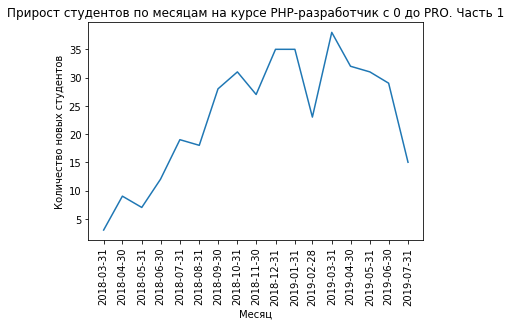

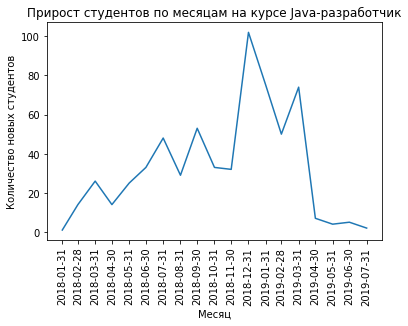

In [27]:
# 2. Построим графики прироста по каждому курсу
# 2.1 Чтобы работал datetime на графиках, устанавливаем конвертер:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# 2.2 В цикле нарисуем 15 графиков, для этого созадим на каждом этапе цикла по холсту
for n in range (15):
    n1 = str(n)
    name_subplot = 'subplot' + n1
    name_fig = 'fig' + n1
    name_fig, name_subplot = plt.subplots()
    name = names[n]
    # далее мы отбираем строки по нужному курсу и с помощью метода resample добавляем строки с пропущенными месяцами
    # применяется функция mean, она возвращает нам тот же прирост, что и был, поскольку для каждого месяца по каждому курсу
    # только одна дата
    # по месяцам, по которым не было значений, функция mean() вернула NaN, их мы заполняем нулями - прирост в этом
    # месяце был нулевой
    # последним действием - приводим к типу целого, поскольку из-за NaN, часть данных переходит в тип float
    df_by_course_all_date = df_growth[df_growth['course_title'] == name].resample('M').mean().fillna(0).astype('int')
    # рисуем график, добавляем подписи оси x и заголовок
    name_subplot.plot(df_by_course_all_date.index, df_by_course_all_date['growth'])
    plt.xticks(df_by_course_all_date.index, rotation='vertical')
    name_subplot.set_title(f'Прирост студентов по месяцам на курсе {name}')
    name_subplot.set_xlabel('Месяц')
    name_subplot.set_ylabel('Количество новых студентов')

In [28]:
# 2.3 Создадим подписи для оси x с помощью метода date_range за период с 03.2016 по 07.2019 с частотой - на конец месяца
start_date = datetime(2016, 3, 31)
end_date = datetime(2019, 7, 31)
x_ticks = pd.date_range(start_date, end_date, freq= 'M').strftime('%d/%m/%Y').tolist()

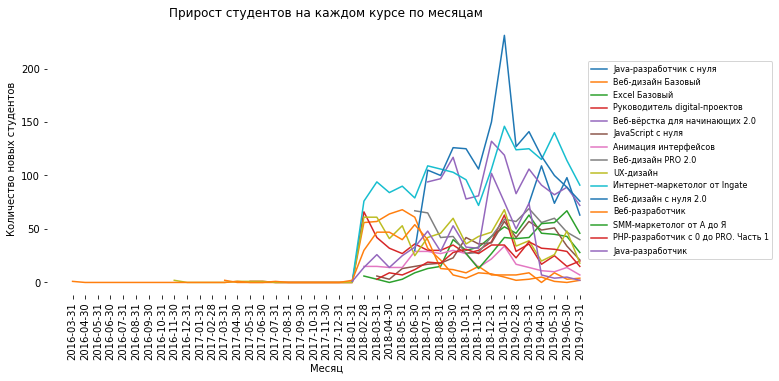

In [29]:
# 3.2 Получаем доступ к холсту
fig_2, subplot_2 = plt.subplots()
fig_2.set_size_inches(10, 5, forward=True)
# 3.3 В цикле рисуем 15 графиков на одном холсте
for name in names:
    # здесь используем тот же код, что и для предыдущего графика
    df_by_course_all_date = df_growth[df_growth['course_title'] == name].resample('M').mean().fillna(0).astype('int')
    # рисуем график и задаем подписи оси x
    subplot_2.plot(df_by_course_all_date.index, df_by_course_all_date['growth'], label=name)
    plt.xticks(x_ticks, rotation='vertical', fontsize = 10)

# Устанавливаем заголовок и легенду
subplot_2.set_title('Прирост студентов на каждом курсе по месяцам')
fig_2.legend(loc="center right", borderaxespad=-9.2, prop={'size': 8}, 
           bbox_to_anchor=(1.03, 0.5), bbox_transform=plt.gcf().transFigure)

# Устанавливаем заголовки осей
subplot_2.set_xlabel('Месяц')
subplot_2.set_ylabel('Количество новых студентов')

# Удаляем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [30]:
# 4. Рассчитаем количество прогрессов по выполнению домашних работ в каждом месяце для каждого курса.
# 4.1 Заполним NaN в столбце finish_date датой 01.01.2000 - заведомо меньшая, чем все стартовые даты (с 2016 года)
df_main['finish_date'] = df_main['finish_date'].fillna('2000-01-01 08:28:50.564437+00').apply(str)

In [31]:
# 4.2 Переводим столбец finish_date в формат datetime с помощью ранее написанной функции 
# (приводим все даты к 1 числу каждого месяца)
df_main['finish_date'] = df_main['finish_date'].apply(f_to_datetime)

In [32]:
# 4.3 Создадим новый датафрейм из основного для расчета прогрессов в каждом месяце за промежуток между датой начала и  
# завершения дом. задания,  отбираем строки с домашним заданием, группируем по курсу, 
# датам начала и конца выполнения задания, подсчитываем количество прогрессов
df_progresses_1 = df_main[df_main['is_homework'] == True].groupby(
    ['course_title', 'start_date', 'finish_date'])['progress_id'].agg('count').reset_index(name='count_prog')

# 4.4 Создаем новый столбец, заполняя его количеством месяцев, прошедших между датой начала и датой конца 
# выполнения дом. задания (timedelta в днях переводим в числовой формат, а потом получаем число месяцев
# целочисленным делением на минимальное число дней в месяце - 28)
df_progresses_1['add_month'] = (df_progresses_1['finish_date'] - df_progresses_1['start_date']).dt.days // 28
df_progresses_1.head(20)

,course_title,start_date,finish_date,count_prog,add_month
0,Excel Базовый,2018-02-01,2000-01-01,2,-236
1,Excel Базовый,2018-02-01,2018-02-01,34,0
2,Excel Базовый,2018-02-01,2018-10-01,1,8
3,Excel Базовый,2018-03-01,2000-01-01,1,-237
4,Excel Базовый,2018-03-01,2018-03-01,5,0
5,Excel Базовый,2018-04-01,2000-01-01,1,-239
6,Excel Базовый,2018-04-01,2018-04-01,11,0
7,Excel Базовый,2018-05-01,2018-05-01,12,0
8,Excel Базовый,2018-05-01,2018-06-01,4,1
9,Excel Базовый,2018-06-01,2000-01-01,3,-241


In [33]:
# 4.5 Создаем массив из нашего датафрейма, где время между концом и началом выполнения домашнего превышает 1 месяц
arr = df_progresses_1[df_progresses_1['add_month'] > 1][[
    'course_title', 'finish_date', 'count_prog', 'add_month']].values
arr

array([['Excel Базовый', Timestamp('2018-10-01 00:00:00'), 1, 8],
       ['Excel Базовый', Timestamp('2018-09-01 00:00:00'), 1, 3],
       ['Excel Базовый', Timestamp('2018-10-01 00:00:00'), 1, 3],
       ...,
       ['Руководитель digital-проектов',
        Timestamp('2019-06-01 00:00:00'), 5, 2],
       ['Руководитель digital-проектов',
        Timestamp('2019-07-01 00:00:00'), 8, 3],
       ['Руководитель digital-проектов',
        Timestamp('2019-07-01 00:00:00'), 9, 2]], dtype=object)

In [34]:
# 4.6 В цикле добавляем недостающие месяцы в список list_2, 
# в list_1 и list_3 добавляем название курса и количество прогрессов по каждому месяцу
list_1 = []
list_2 = []
list_3 = []
for name in names: #для каждого курса
    for n in range(arr.shape[0]): #проходимся по массиву
        if arr[n][0] == name: #по каждому курсу в массиве
            for t in range(arr[n][3]): #по каждому пропущенному месяцу между датами
                list_1.append(arr[n][0]) #название курса
                list_2.append(arr[n][1] - timedelta(28 * t)) #вычитаем количество месяцев
                list_3.append(arr[n][2])     #добавляем число прогрессов

In [35]:
# 4.7 Из наших списков создаем датафрейм
df_finish_progresses = pd.DataFrame({'course_title' : list_1, 'finish_date' : list_2, 'total_progresses' : list_3})
df_finish_progresses.head()

,course_title,finish_date,total_progresses
0,Java-разработчик c нуля,2019-05-01,1
1,Java-разработчик c нуля,2019-04-03,1
2,Java-разработчик c нуля,2019-06-01,4
3,Java-разработчик c нуля,2019-05-04,4
4,Java-разработчик c нуля,2019-04-06,4


In [36]:
# 4.8 Даты получились с разным числом дней, тк брали 28 дней в месяце,
# c помощью функции приведем все даты к первому числу месяца
f_to_1st = lambda x: datetime(x.year, x.month, 1)
df_finish_progresses['finish_date'] = df_finish_progresses['finish_date'].apply(f_to_1st)

In [37]:
# 4.9 Сгруппируем наш датафрейм по курсу и дате, подсчитаем прогрессы
df_finish_progresses = df_finish_progresses.groupby(['course_title', 'finish_date'])[
    'total_progresses'].agg('sum').reset_index(name='finish_progresses')
df_finish_progresses.head()

,course_title,finish_date,finish_progresses
0,Excel Базовый,2018-03-01,1
1,Excel Базовый,2018-04-01,1
2,Excel Базовый,2018-05-01,1
3,Excel Базовый,2018-06-01,1
4,Excel Базовый,2018-07-01,2


In [38]:
# 4.9 Создадим новый датафрейм для подсчета прогрессов по дате начала выполнения дом. задания
# группируем основной датафрейм по курсу и дате начала выполнения д/з, подсчитаем прогрессы
df_start_progresses = df_main[df_main['is_homework'] == True].groupby(
    ['course_title', 'start_date'])['progress_id'].agg('count').reset_index(name='start_progresses')
df_start_progresses.head()

,course_title,start_date,start_progresses
0,Excel Базовый,2018-02-01,37
1,Excel Базовый,2018-03-01,6
2,Excel Базовый,2018-04-01,12
3,Excel Базовый,2018-05-01,16
4,Excel Базовый,2018-06-01,32


In [39]:
# 4.10 Формируем новый датафрейм, путем внешнего слияния двух вышеупомянутых датафреймов
df_total_progresses = pd.merge(left=df_start_progresses, right=df_finish_progresses, left_on=['course_title', 'start_date'], 
                   right_on=['course_title', 'finish_date'], how='outer')
# 4.11 Заполняем NaN в столбце finish_progresses нулями
df_total_progresses['finish_progresses'] = df_total_progresses['finish_progresses'].fillna(0)
df_total_progresses['start_progresses'] = df_total_progresses['start_progresses'].fillna(0)
# 4.12 Рассчитываем новый столбец добавляя к прогрессам по началу выполнения задания, прогрессы по концу выполнения задания
df_total_progresses['total_progresses'] = df_total_progresses['start_progresses'] + df_total_progresses['finish_progresses']
# 4.13 Заполняем NaN в столбце start_date значениями из столбца finish_date:
miss_dates_dict = df_total_progresses[df_total_progresses['start_date'].isnull()]['finish_date'].to_dict()
df_total_progresses['start_date'].fillna(value=miss_dates_dict, inplace=True)
df_total_progresses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 254
Data columns (total 6 columns):
course_title         255 non-null object
start_date           255 non-null datetime64[ns]
start_progresses     255 non-null float64
finish_date          222 non-null datetime64[ns]
finish_progresses    255 non-null float64
total_progresses     255 non-null float64
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 13.9+ KB


In [40]:
# 4.14 Делаем дату индексом датафрейма:
df_total_progresses.index = df_total_progresses['start_date']
df_total_progresses.index.name = 'date'
# 4.14 Сортируем индексы по каждому курсу:
for name in names:
    df_total_progresses.sort_index
df_total_progresses.head()

,course_title,start_date,start_progresses,finish_date,finish_progresses,total_progresses
date,,,,,,
2018-02-01,Excel Базовый,2018-02-01,37.0,NaT,0.0,37.0
2018-03-01,Excel Базовый,2018-03-01,6.0,2018-03-01,1.0,7.0
2018-04-01,Excel Базовый,2018-04-01,12.0,2018-04-01,1.0,13.0
2018-05-01,Excel Базовый,2018-05-01,16.0,2018-05-01,1.0,17.0
2018-06-01,Excel Базовый,2018-06-01,32.0,2018-06-01,1.0,33.0


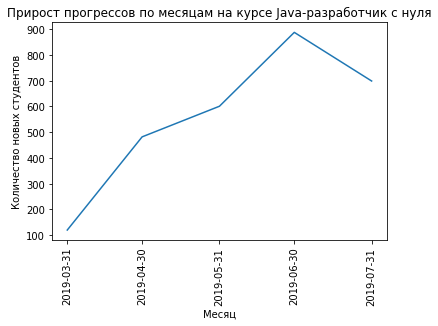

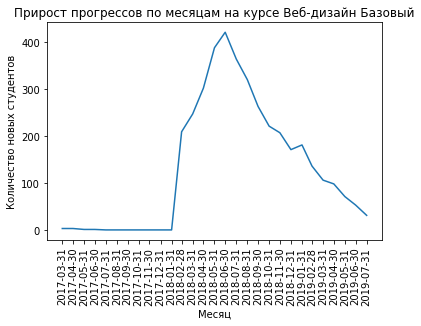

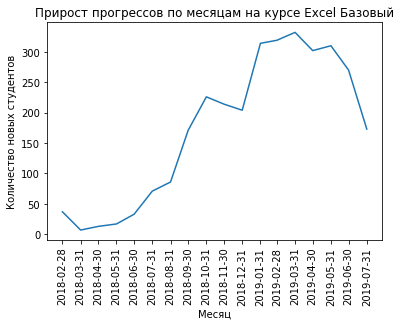

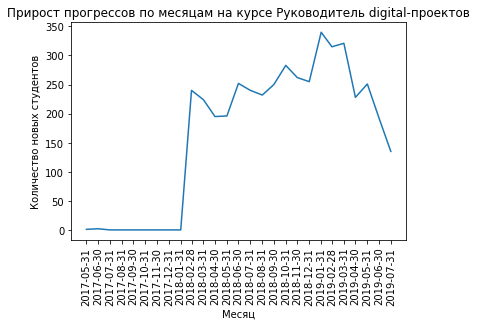

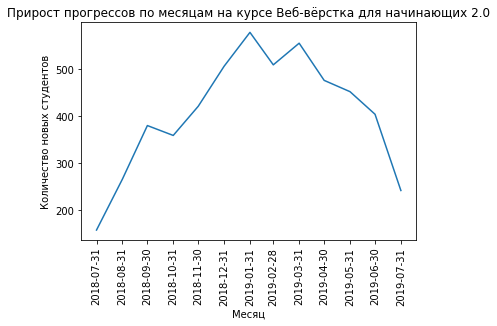

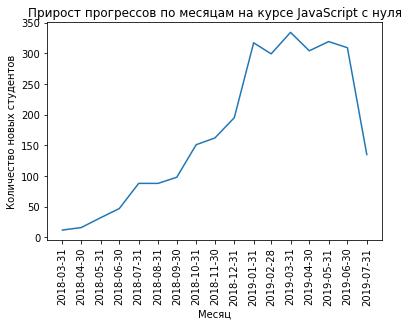

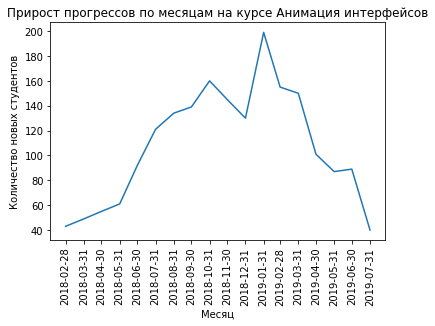

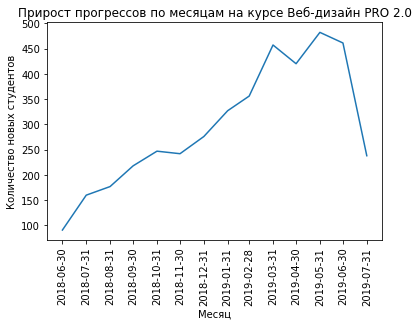

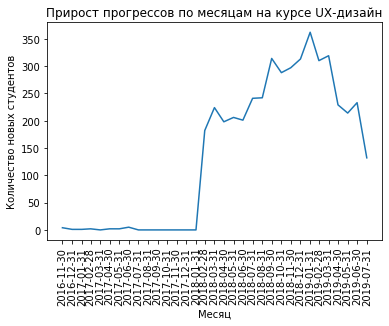

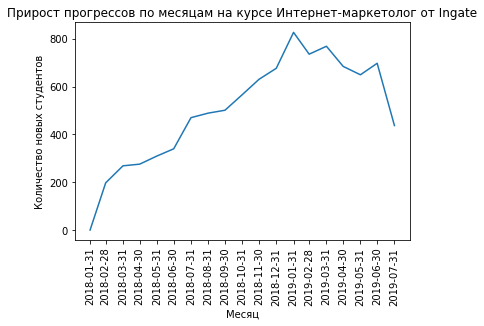

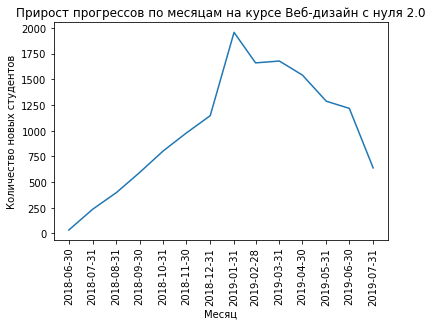

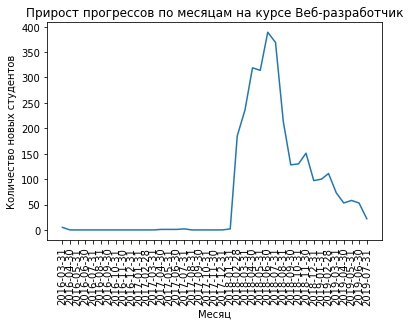

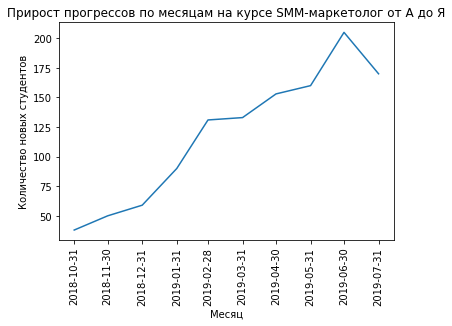

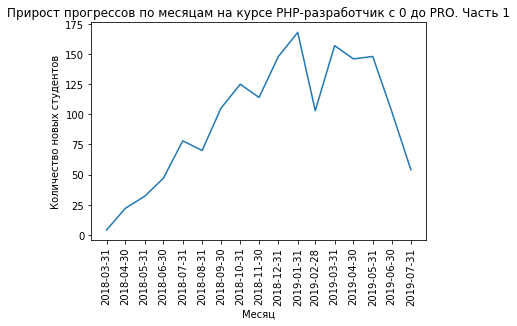

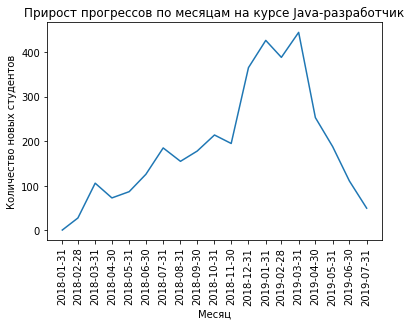

In [41]:
# 5. Построим line-graph по четвертому пункту (15 графиков, графики должны иметь заголовки, оси должны быть подписаны,
# Ticks нужно развернуть так, чтобы они были читаемы
# 5.1 В цикле нарисуем 15 графиков, для этого созадим на каждом этапе цикла по холсту
for n in range (15):
    n1 = str(n)
    name_subplot = 'subplot' + n1
    name_fig = 'fig' + n1
    name_fig, name_subplot = plt.subplots()
    name = names[n]
    # далее мы отбираем строки по нужному курсу и с помощью метода resample добавляем строки с пропущенными месяцами
    # применяется функция mean, она возвращает нам тот же прирост, что и был, поскольку для каждого месяца по каждому курсу
    # только одна дата
    # по месяцам, по которым не было значений, функция mean() вернула NaN, их мы заполняем нулями - прирост в этом
    # месяце был нулевой
    # последним действием - приводим к типу целого, поскольку из-за NaN, часть данных переходит в тип float
    df_total_progresses_all_date = df_total_progresses[
        df_total_progresses['course_title'] == name].resample('M').mean().fillna(0).astype('int')
    # рисуем график, добавляем подписи оси x и заголовок
    name_subplot.plot(df_total_progresses_all_date.index, df_total_progresses_all_date['total_progresses'])
    plt.xticks(df_total_progresses_all_date.index, rotation='vertical')
    name_subplot.set_title(f'Прирост прогрессов по месяцам на курсе {name}')
    name_subplot.set_xlabel('Месяц')
    name_subplot.set_ylabel('Количество новых студентов')

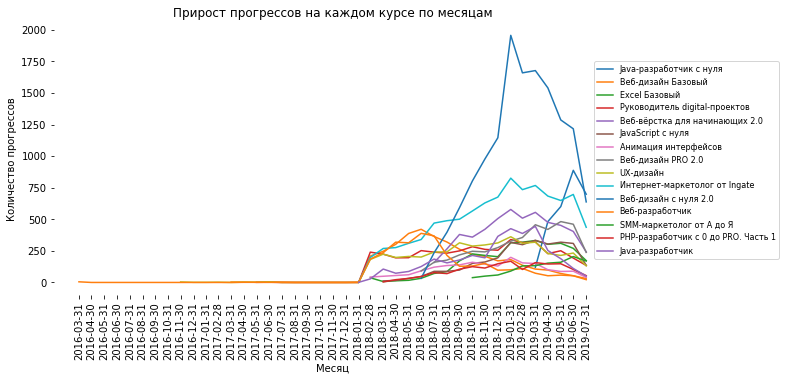

In [42]:
# 6. Построиv один line-graph для всех курсов по четвертому пункту 
# 6.1 Получаем доступ к холсту
fig_2, subplot_2 = plt.subplots()
fig_2.set_size_inches(10, 5, forward=True)
# 6.2 В цикле рисуем 15 графиков на одном холсте
for name in names:
    # получаем методом resample датафрейм со всеми датами, аналогично предыдущему заданию
    df_total_progresses_all_date = df_total_progresses[
        df_total_progresses['course_title'] == name].resample('M').mean().fillna(0).astype('int')
    # рисуем графики и задаем подписи оси x
    subplot_2.plot(df_total_progresses_all_date.index, df_total_progresses_all_date['total_progresses'], label=name)
    plt.xticks(x_ticks, rotation='vertical', fontsize = 10)

# 6.3 Устанавливаем заголовок и легенду
subplot_2.set_title('Прирост прогрессов на каждом курсе по месяцам')
fig_2.legend(loc="center right", borderaxespad=-9.2, prop={'size': 8}, 
           bbox_to_anchor=(1.03, 0.5), bbox_transform=plt.gcf().transFigure)

# 6.4  Устанавливаем заголовки осей
subplot_2.set_xlabel('Месяц')
subplot_2.set_ylabel('Количество прогрессов')

# 6.5 Удаляем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

### Выводы:
1. Анализ прироста студентов по курсам показал, что наиболее популярные курсы (на которых учится больше студентов) имеют и самые высокие показатели ежемесячного прироста. Так, на самом многочисленном курсе "Маркетолог от Ingate" медианный прирост студентов составляет +103 чел./мес., а на втором по популярности курсе "Веб-дизайн с нуля 2.0" этот показатель достигает +112 чел./мес. Показатель прироста выше медианного прироста студентов по всем курсам (35.0 чел./мес.) отмечается также на курсах: "Веб-верстка для начинающих 2.0" (+91 чел./мес.), "Java-разработчик с нуля" (+74 чел./мес.), "Веб-дизайн PRO 2.0" (+51.5 чел./мес.), "SMM-маркетолог от А до Я" (+42 чел./мес.) и "UX-дизайн" (+40 чел./мес.)

2. Наиболее проблемные курсы - "Веб-дизайн Базовый", "Веб-разработкик" и "Анимация интерфейсов", эти курсы наименее популярны и слабо приростают новыми студентами, медианный прирост на них миниальный (+7.5, +9.0 и +15.0 чел./мес. соответственно).

3. Также следует отметить, что некоторые немногочисленные курсы ("SMM-маркетолог от А до Я", "Java-разработчик с нуля") имеют неплохие приросты студентов (+42.0 и 74.0 чел./мес. соответственно). Оба курса относительно молодые  и вероятно этим можно объяснить их малочисленность.

4. Что касается динамики прироста, то до 2018 года он практически нулевой. С 2018 года по всем рассматриваемым курсам приросты студентов начинают расти, что вероятно связано с началом активного продвижения онлайн-школы. На большинстве курсов отмечаются выраженные пики прироста студентов, относящиеся к периоду 12.2018-03.2019, что скорее всего объясняется активной рекламной компанией и новогодними скидками.

5. Прирост прогрессов напрямую связан с притоком новых студентов, поэтому на большинстве курсов мы также видим пик прироста прогрессов, приходящихся на период (с небольшим временным лагом) с 01.2019 по 05.2019. В этот период нагрузка на преподавателей возрастает.

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [43]:
#1. Рассчитаем минимальное, максимальное, среднее, медианное время прохождения каждого модуля для каждого курса
#1.1. Создадим новый датафрейм из наших данных
df_main_2 = pd.merge(left=df_merge_2, right=df_course_contents, left_on=['course_id', 'module_number', 'lesson_number'], 
                   right_on=['course_id', 'module_number', 'lesson_number'])
#1.2. Переведем столбцы с датами начала и завершения выполнения работы в формат datetime
df_main_2['start_date'] = pd.to_datetime(df_main_2['start_date'])
df_main_2['finish_date'] = pd.to_datetime(df_main_2['finish_date'])
df_main_2.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00:00,2018-06-23 08:28:52.439542+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00:00,2019-03-18 14:54:50.979612+00:00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.198620+00:00,2019-07-11 08:03:09.222385+00:00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00:00,2018-07-27 16:13:55.086871+00:00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00:00,2019-04-24 18:44:57.507857+00:00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False


In [44]:
#1.3. Создадим новый датафрейм отфильтровав основной, отбираем прогрессы с выполненым дом. заданием
df_modules_with_hw_done = df_main_2.loc[
    (df_main_2['is_homework'] == True) & (df_main_2['status'] == 'done')]
 
#1.4. Вычислим разницу между датой начала выполнения дом. задания и датой его завершения, добавим данные в новый
#столбец датафрейма, переведя из timedelta в int в днях
df_modules_with_hw_done['duration'] = ((df_modules_with_hw_done['finish_date'] - df_modules_with_hw_done[
    'start_date']).dt.days)

#1.5 Поскольку в некоторых прогрессах по каким-то причинам дата завершения дом. задания меньше даты начала выполнения на 
# несколько секунд, заменим в столбце разницы дат получившееся отрицательное значение на 0
df_modules_with_hw_done['duration'].loc[df_modules_with_hw_done['duration'] < 0] = 0

#1.6 Сгруппируем датафрейм по курсу и модулю и рассчитаем агрегированные значения:
df_duration_of_hw = df_modules_with_hw_done.groupby(['course_title', 'module_title'])['duration'].agg(
    ['min', 'max', 'median', 'mean']).reset_index(level=['course_title', 'module_title'])

df_duration_of_hw.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,course_title,module_title,min,max,median,mean
0,Excel Базовый,Визуализация данных Excel,0,174,4.0,9.375000
1,Excel Базовый,Основной функционал Excel,0,183,2.0,5.467249
2,Excel Базовый,Основной функционал Excel (продолжение),0,184,1.0,3.768473
3,Excel Базовый,Сводные таблицы Excel,0,239,2.0,8.967742
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,0,175,2.5,6.818519


In [45]:
#1.7 Теперь нам нужно определить время выполнения модуля, если в нем более одного урока с домашней работой
#Сначала выведем список таких модулей из таблицы взятой из файла course_contents.csv, а также списки
#последнего урока с домашним заданием по каждому модулю и курсов, к которым эти модули относятся
df_modules_more_one_hw = df_course_contents[df_course_contents['is_homework'] == True].groupby(
    ['course_id', 'module_title'])['lesson_number'].agg(['min', 'max']).reset_index(level='module_title')

modules_with_any_hw = list(df_modules_more_one_hw.loc[
    df_modules_more_one_hw['min'] != df_modules_more_one_hw['max'], 'module_title'])

lessons_list = list(df_modules_more_one_hw.loc[df_modules_more_one_hw['min'] != df_modules_more_one_hw['max'], 'max'])

course_id_list = list(df_modules_more_one_hw.loc[df_modules_more_one_hw['min'] != df_modules_more_one_hw['max']].index)

print(f'{course_id_list}, \n{modules_with_any_hw}, \n{lessons_list}')

['943306102e5b067d08a29094f37b8193', '943306102e5b067d08a29094f37b8193', '943306102e5b067d08a29094f37b8193', '943306102e5b067d08a29094f37b8193', '943306102e5b067d08a29094f37b8193', '943306102e5b067d08a29094f37b8193', 'c9fcb746d51e41bc5a217002d081454b', 'dad6f6ffc086caa89e2f40c28a9c7490'], 
['Исключения, отладка, тестирование и логгирование', 'Массивы и коллекции', 'Наследование и полиморфизм', 'Особенности ООП в Java', 'Работа с файлами и сетью', 'Числа, строки и даты', ' Введение в UX', 'Concept design: творчество в дизайне'], 
[11, 13, 13, 8, 14, 27, 5, 8]


In [46]:
#1.8 В цикле из основного датафрейма отбираем только тех студентов (добавляем их id в список),
#которые выполнили последнее задание в модулях с несколькими домашками,
#для этого используем вышесозданные списки:
t = 0
students_id_list = []
for module in modules_with_any_hw:
    students_id_list.append(list(df_main_2.loc[(df_main_2['is_homework'] == True) & (
        df_main_2['module_title'] == module) & (df_main_2['course_id'].isin(course_id_list))  & (
        df_main_2['lesson_number'] == lessons_list[t]) & (
        df_main_2['status'] == 'done'), 'student_id']))
    t += 1
students_id_list[0] #каждый элемент списка содержит вложенный список с id студентов по каждому модулю

['3c65f72fc4a9528b119e2af3caa255c4',
 '818a60690cc45e7224ca047907e0cbd5',
 'd4ff150e21f6e45e9e74759b9f2ca235',
 '03802954ea7d0a7de28272a8b3986ebe',
 '6859dd67d6f64364005b93c3798e8b40',
 'c21fa1f7fa61d11253e4cc8eeeb03027',
 '3b01f456886c19e843d8842705061c47',
 '975580bcbba9e3d2feb1f2ed922a3ca9',
 '22e98837f6d66a798825f21af8987364',
 '6c8484c5471e10214572860095b0b782',
 '1fd29ddde847287175dbc1a383c9d07e',
 '47c3c0e20c441a4fa021ca4bd8044e27',
 'b30432b7839a8aed53f2e1ff2202e1d7',
 '4e5f1ba884ba5759c07cf6e942ae5e98',
 '1a0acf593d0a38155bafdf29e3cba338',
 '2ed03f6827f81b2f2dfe3d36db8066f9',
 'ed93dfa830d97cf67eb047dd7a4aa181']

In [47]:
#1.9 Теперь нужно отобрать прогрессы только этих студентов (которые завершили все уроки модуля).
#Для этого в цикле формируем датафрейм из основного, отбирая только модули с более, чем 1 д/з, 
#и прогрессы только тех студентов, которые завершили эти модули (на основе вышесозданного списка их id)
t = 0
df_students_finished_modules = pd.DataFrame()
for module in modules_with_any_hw:
    df_students_finished_modules = df_students_finished_modules.append(df_main_2.loc[
    (df_main_2['is_homework'] == True) & (df_main_2['course_id'].isin(course_id_list)) & (
        df_main_2['module_title'] == module) & (
        df_main_2['student_id'].isin(students_id_list[t]))])
    t += 1

#1.10 Группируем получившийся датафрейм по курсу, модулю, студенту и получаем минимальное значение даты начала
# домашней работы и максимальное значения даты завершения д/з по каждому студенту
df_students_finished_modules = df_students_finished_modules.groupby(['student_id', 'course_title', 'module_title'])[
        ['start_date', 'finish_date']].agg({'start_date':'min', 'finish_date':'max'}).reset_index(
        level=['student_id', 'course_title', 'module_title'])

#1.11 Рассчитываем длительность выполнения д/з каждым студентом (разница между датой начала выполнения первого задания
# и датой окончания выполнения последнего задания в модуле) и переводим из timedelta в int 
df_students_finished_modules['duration'] = (
    df_students_finished_modules['finish_date'] - df_students_finished_modules['start_date']).dt.days

#1.12 Группируем датафрейм и рассчитываем агрегированные показатели длительности прохождения каждого модуля 
df_students_finished_all_hw = df_students_finished_modules.groupby(['course_title', 'module_title'])['duration'].agg(
    ['min', 'max', 'median', 'mean']).reset_index(level=['course_title', 'module_title'])

df_students_finished_all_hw

,course_title,module_title,min,max,median,mean
0,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",5,39,14.0,15.352941
1,Java-разработчик c нуля,Массивы и коллекции,0,62,11.0,15.093333
2,Java-разработчик c нуля,Наследование и полиморфизм,0,71,13.0,14.916667
3,Java-разработчик c нуля,Особенности ООП в Java,1,33,6.0,8.189189
4,Java-разработчик c нуля,Работа с файлами и сетью,10,14,12.0,12.000000
5,Java-разработчик c нуля,"Числа, строки и даты",0,71,11.0,16.681818
6,UX-дизайн,Concept design: творчество в дизайне,14,284,51.0,71.906250
7,Веб-дизайн PRO 2.0,Введение в UX,0,298,17.5,32.914062


In [48]:
#1.13 Теперь осталось заменить значения столбцов с агрегированными показателями по модулям с более, чем одним д/з
# в созданном ранее общем датафрейме df_duration_of_hw, для этого создадим список с модулями, курсами 
# из df_students_finished_all_hw, а также список названий столбцов с агрегированными показателями
mod_list = list(df_students_finished_all_hw['module_title'])
course_title_list = list(df_students_finished_all_hw['course_title'])
columns_list = ['min', 'max', 'median', 'mean']

In [49]:
#1.14 В цикле заменим значения строк общего датафрейма (df_duration_of_hw), соответствующих модулям с более, чем
#одним д/з, в столбцах с агрегированными показателями, на аналогичные значения из полученных выше списков.
for k in range(4):
    replace_list = list(df_students_finished_all_hw[columns_list[k]])
    i = 0
    for mod in mod_list:
        df_duration_of_hw.loc[(df_duration_of_hw['module_title'] == mod) & (
            df_duration_of_hw['course_title'].isin(course_title_list)), [columns_list[k]]] = replace_list[i]
        i += 1

#1.15 Проверим, заменились ли значения в общем датафрейме
df_duration_of_hw.loc[(df_duration_of_hw['module_title'].isin(mod_list)) & (
    df_duration_of_hw['course_title'].isin(course_title_list))]

#df_duration_of_hw - содержит все неоходимые агрегированные значения длительности выполнения каждого модуля

,course_title,module_title,min,max,median,mean
26,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",5,39,14.0,15.352941
27,Java-разработчик c нуля,Массивы и коллекции,0,62,11.0,15.093333
28,Java-разработчик c нуля,Наследование и полиморфизм,0,71,13.0,14.916667
30,Java-разработчик c нуля,Особенности ООП в Java,1,33,6.0,8.189189
31,Java-разработчик c нуля,Работа с файлами и сетью,10,14,12.0,12.000000
33,Java-разработчик c нуля,"Числа, строки и даты",0,71,11.0,16.681818
66,UX-дизайн,Concept design: творчество в дизайне,14,284,51.0,71.906250
99,Веб-дизайн PRO 2.0,Введение в UX,0,298,17.5,32.914062


In [50]:
# для выводов найдем, где медианное время прохождения модуля больше месяца (30 дней)
df_duration_of_hw.loc[df_duration_of_hw['median'] >= 30].sort_values('median')

,course_title,module_title,min,max,median,mean
155,Веб-разработчик,Экзаменационная работа,0,275,32.0,67.272727
52,PHP-разработчик с 0 до PRO. Часть 1,База данных MySQL,4,142,37.0,51.416667
87,Анимация интерфейсов,Дипломная работа,6,64,40.0,40.800000
50,JavaScript с нуля,Экзаменационное задание,10,92,41.0,45.076923
75,UX-дизайн,Техника успешной презентации,0,300,43.5,69.230769
66,UX-дизайн,Concept design: творчество в дизайне,14,284,51.0,71.906250
71,UX-дизайн,Visual design теория и практика,0,342,55.0,64.254545
114,Веб-дизайн Базовый,Дипломная работа,9,425,62.5,84.723684
54,PHP-разработчик с 0 до PRO. Часть 1,Курсовая работа,25,187,89.0,97.700000


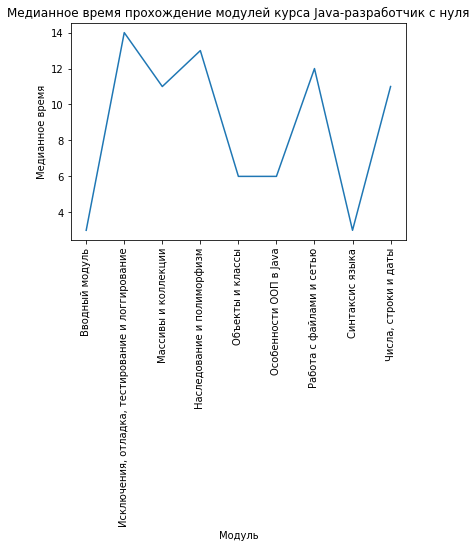

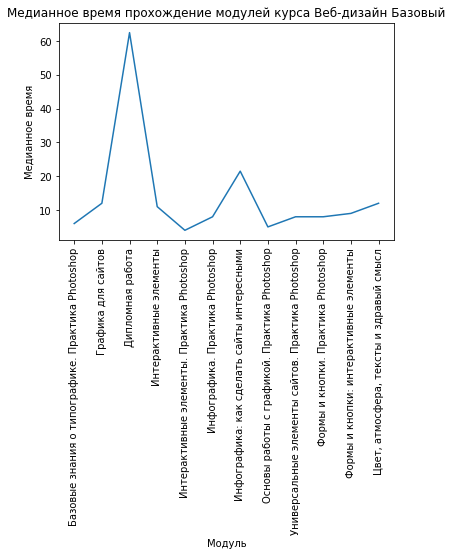

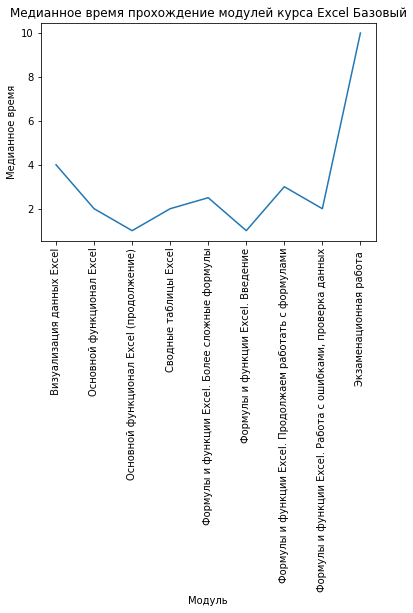

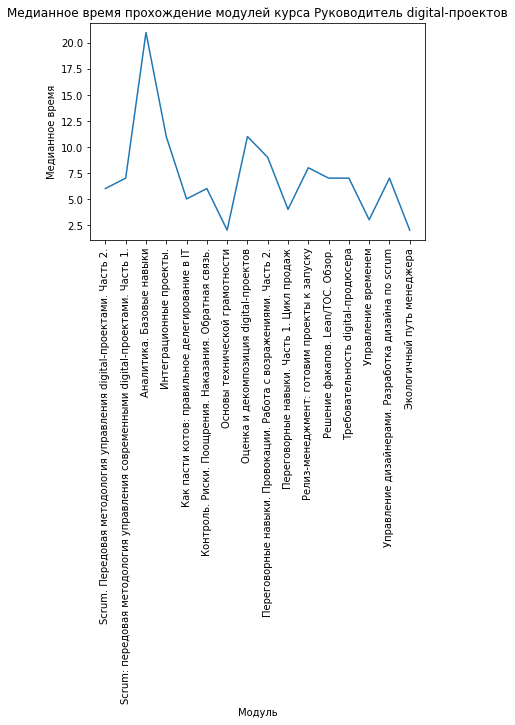

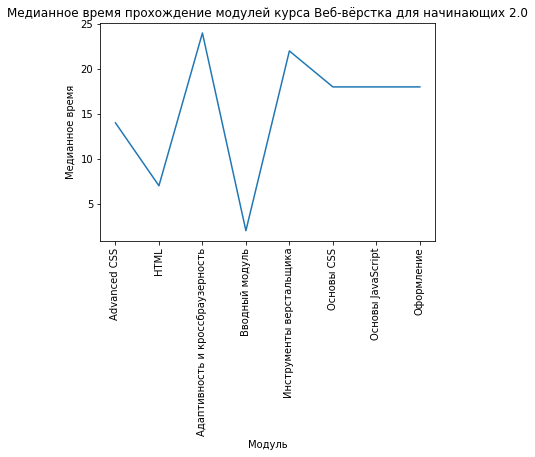

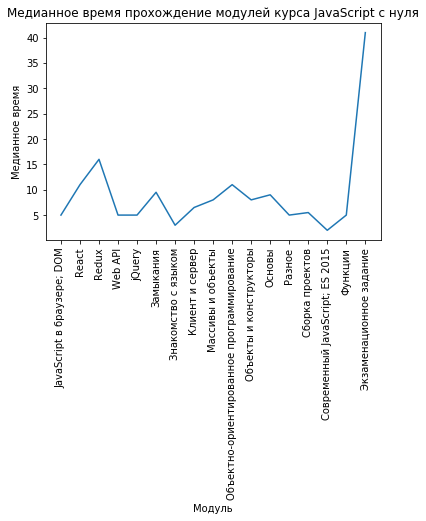

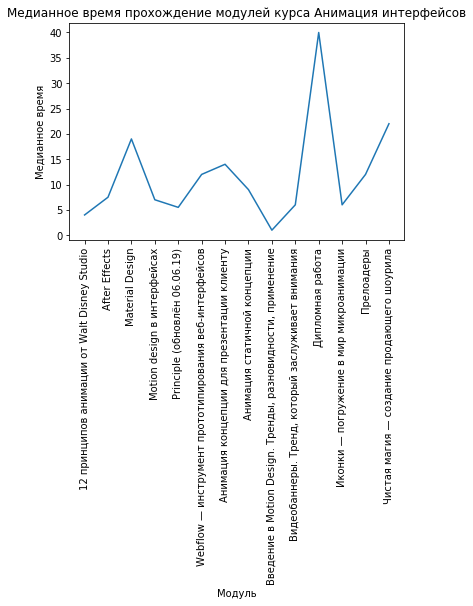

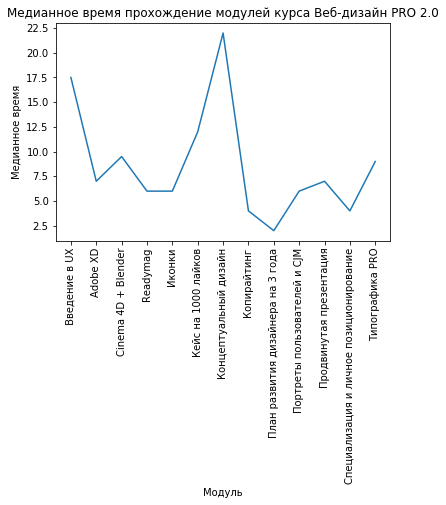

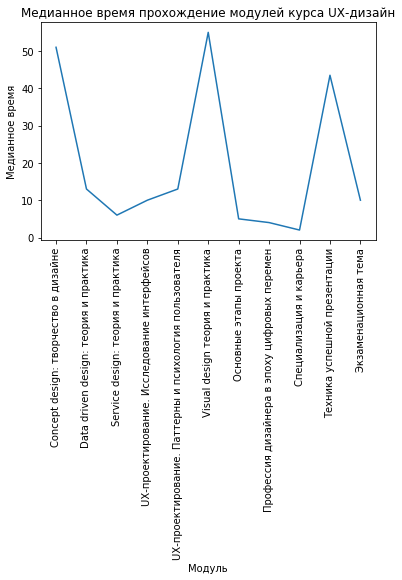

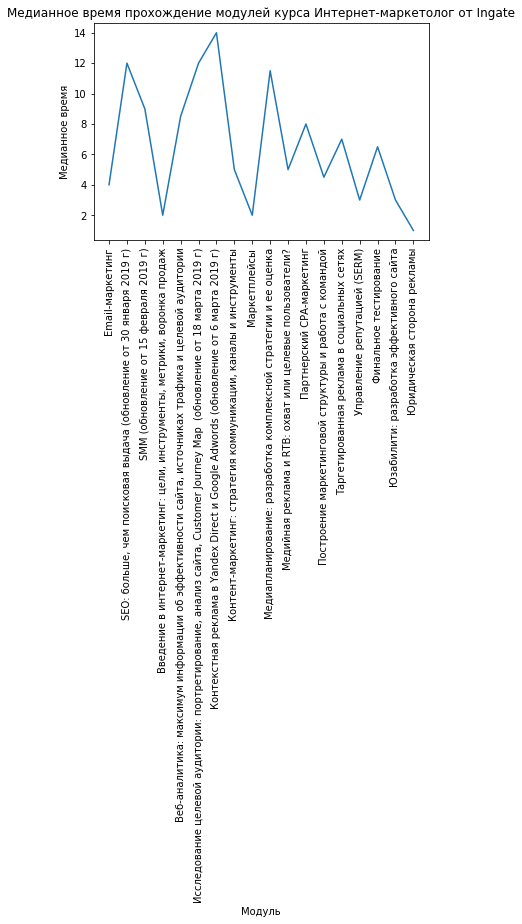

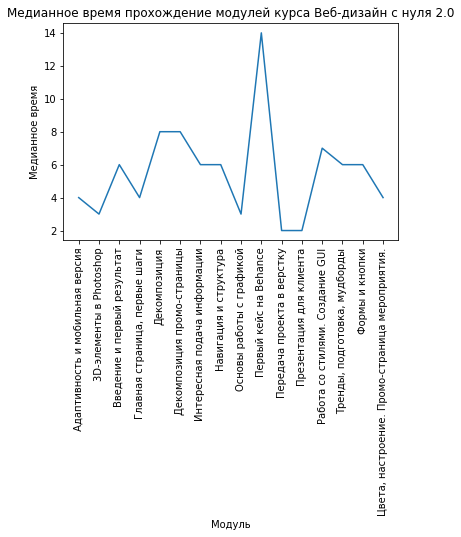

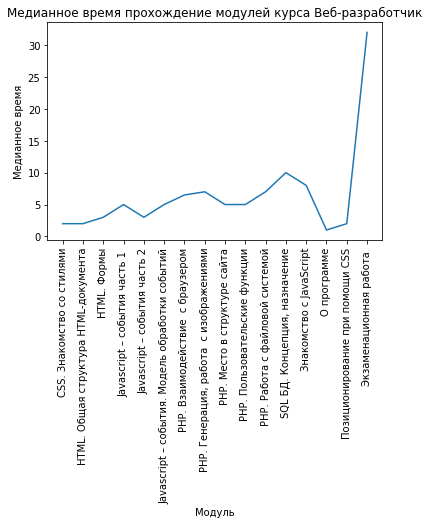

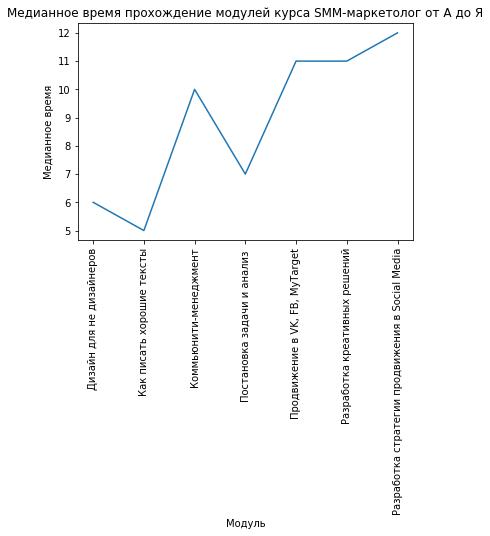

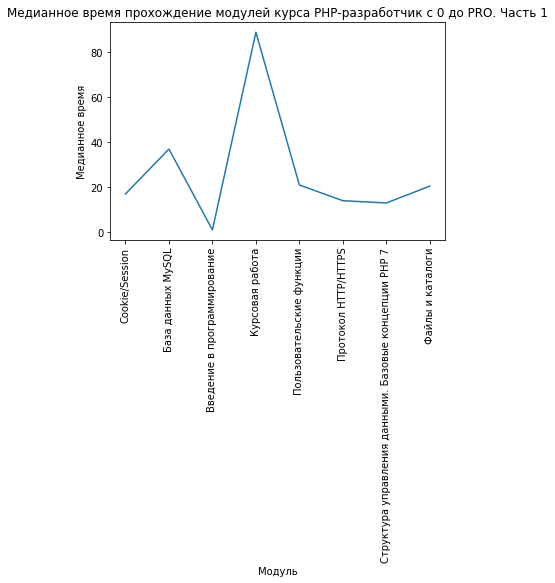

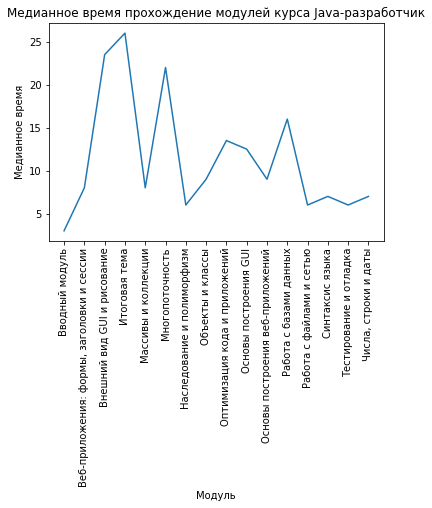

In [51]:
#2. На основании первого пункта построим line-graph с медианным временем прохождения каждого модуля для каждого курса
#(15 графиков c заголовками)
# 2.1 В цикле нарисуем 15 графиков, для этого созадим на каждом этапе цикла по холсту
for n in range (15):
    n1 = str(n)
    name_subplot = 'subplot' + n1
    name_fig = 'fig' + n1
    name_fig, name_subplot = plt.subplots()
    name = names[n]
    # рисуем график, добавляем подписи оси x и заголовок
    name_subplot.plot(df_duration_of_hw.loc[
        df_duration_of_hw['course_title'] == name, 'module_title'], df_duration_of_hw.loc[
        df_duration_of_hw['course_title'] == name, 'median'])
    plt.xticks(df_duration_of_hw.loc[df_duration_of_hw['course_title'] == name, 'module_title'], rotation='vertical')
    name_subplot.set_title(f'Медианное время прохождение модулей курса {name}')
    name_subplot.set_xlabel('Модуль')
    name_subplot.set_ylabel('Медианное время')

In [52]:
#3. Теперь построим график медианных значений продолжительности прохождения модулей по месяцам по каждому курсу(15 графиков)
#3.1 Для построения графика по месяцам, скопируем ранее созданные датафреймы
df_duration_of_modules = df_modules_with_hw_done.copy() # это датафрейм с длительностью прохождения по всем модулям 
df_duration_by_date = df_students_finished_modules.copy() # этот датафрейм с длительностью прохождений по модулям 
#с более, чем одним д.з
#3.2 Создадим массив из столбцов второго датафейма, необходимых для замены значений в столбце длительности прохождения
# модуля первого датафрейма
arr_to_replace = df_duration_by_date[['course_title', 'module_title', 'student_id', 'duration']].to_numpy()

In [53]:
#3.3 В цикле заменим эти значения
for n in range(arr_to_replace.shape[0]):
    df_duration_of_modules.loc[(df_duration_of_modules['course_title'].isin(course_title_list)) & (
        df_duration_of_modules['module_title'] == arr_to_replace[n][1]) & (
        df_duration_of_modules['student_id'] == arr_to_replace[n][2]), ['duration']] = arr_to_replace[n][3]
    n += 1   

In [54]:
#3.4 Сделаем дату начала выполнения задания индексом строк для применения функции resample
df_duration_of_modules.index = df_duration_of_modules['start_date']

In [55]:
#3.5 Переименуем название индекса строк
df_duration_of_modules.index.name = 'date'

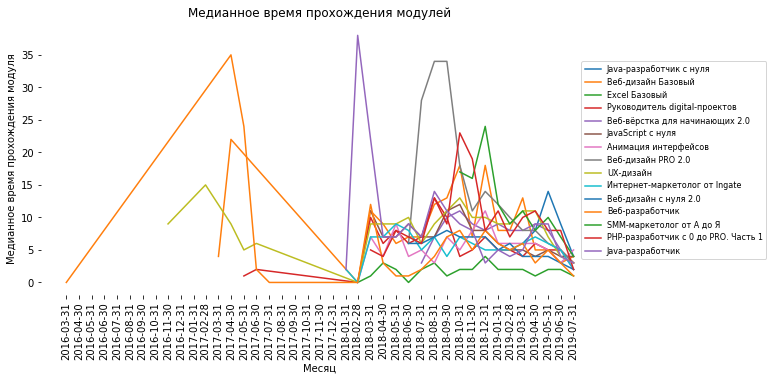

In [56]:
#3.6 Получим доступ к холсту и зададим его размеры
fig_3, subplot_3 = plt.subplots()
fig_3.set_size_inches(10, 5, forward=True)

#3.7 В цикле рисуем 15 графиков на одном холсте
for name in names:
    # сортируем индексы для применения resample 
    df_duration_of_modules[df_duration_of_modules['course_title'] == name].sort_index()
    # применяем resample - группируем строки по каждому курсу, рассчитывая медианное значение длительности прохождения
    # модуля, удаляем строки с месяцами, по которым нет значений и переводим в целое
    df_duration_of_modules_resample = df_duration_of_modules[
        df_duration_of_modules['course_title'] == name].resample('M').median().dropna().astype(int)
    # добавляем столбец с названием курса
    df_duration_of_modules_resample['course_title'] = name
    # рисуем графики и задаем подписи оси x
    subplot_3.plot(df_duration_of_modules_resample.loc[
        df_duration_of_modules_resample['course_title'] == name].index, df_duration_of_modules_resample.loc[
        df_duration_of_modules_resample['course_title'] == name, 'duration'], label=name)
    plt.xticks(x_ticks, rotation='vertical', fontsize = 10)

# 6.3 Устанавливаем заголовок и легенду
subplot_3.set_title('Медианное время прохождения модулей')
fig_3.legend(loc="center right", borderaxespad=-9.2, prop={'size': 8}, 
           bbox_to_anchor=(1.03, 0.5), bbox_transform=plt.gcf().transFigure)

# 6.4  Устанавливаем заголовки осей
subplot_3.set_xlabel('Месяц')
subplot_3.set_ylabel('Медианное время прохождения модуля')

# 6.5 Удаляем рамку
for spine in plt.gca().spines.values():
    spine.set_visible(False)

### Выводы:
1. Анализ времени прохождения модулей показал, что наиболее сложные по прохождению модули - это итоговые работы студентов (дипломные, экзаменационные и курсовые). Самыми трудными для прохождения оказались следующие модули: Курсовая работа на курсе "PHP-разработчик от 0 до PRO" и Дипломная работа на курсе "Веб-дизайн Базовый". Медианное время выполнение здесь составило более 2-х месяцев (89.0 и 62.5 дней соответственно).

2. Более месяца составило медианное время прохождение итоговых работ на курсах "JavaScript с нуля" (Экзаменационное задание - 41 день), "Анимация интрерфейсов" (Дипломная работа - 40 дней), "Веб-разработчик" (Экзаменационная работа - 32 дня).

3. Также более месяца составило медианное время прохождения некоторых модулей, не связанных с итоговыми работами. Наиболее сложным оказался модули "Visual-design теория и практика" (55 дней), "Concept-design. Творчество в дизайне" (51 день) и" Техника успешной презентации" (43.5 дней) на курсе "UX-дизайн". А также модуль "Базы данных MySQL" на курсе "PHP-разработчик с 0 до PRO".


## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [57]:
#1.1 Отберем прогрессы, где студенты приступили к выполнению домашнего заданием и группируем по каждому курсу, модулю и 
#уроку, агрегируем по количеству студентов
df_students_start_modules = df_main_2[df_main_2['is_homework'] == True].groupby(
    ['course_title', 'course_id', 'module_title', 'module_number', 'lesson_number'])['student_id'].agg(
    'count').reset_index(name='count_start')

In [58]:
#1.2 Теперь для модулей с несколькими д/з нужно оставить только те строки, кторые соответствуют количеству студентов,
#приступивших к первому уроку с д/з в модуле. Для этого добавим в цикле в список индексы строк, которые не относятся 
#к первому уроку c д/з в таких модулях. Для этого используем ранее созданный датафрейм, распечатаем его здесь
min_lesson_list = df_modules_more_one_hw.loc[
    df_modules_more_one_hw['min'] != df_modules_more_one_hw['max'], 'min'].to_list()
min_lesson_list

[4, 5, 2, 2, 5, 6, 3, 7]

In [59]:
n = 0
index_list = []
for mod in modules_with_any_hw:
    index = list(df_students_start_modules.loc[(df_students_start_modules['course_title'].isin(course_title_list)) & (
        df_students_start_modules['module_title'] == mod) & (
        df_students_start_modules['lesson_number'] != min_lesson_list[n])].index)
    index_list.append(index)
    n += 1 
print(index_list)


[[27, 28], [30, 31, 32, 33], [35, 36, 37], [40], [42, 43, 44, 45], [48, 49, 50, 51, 52], [121], [86]]


In [60]:
#1.2 Теперь удалим эти строки в цикле:
for t in range(len(index_list)):
    for i in range(len(index_list[t])):
        df_students_start_modules.drop(index_list[t][i], inplace=True)

In [61]:
#1.2 Получили количество студентов, начавших выполнение д/з в каждом модуле, отсортируем по номеру модуля
df_students_start_modules = df_students_start_modules.sort_values(['course_title', 'module_number'])

In [62]:
df_students_start_modules.head(9) 

,course_title,course_id,module_title,module_number,lesson_number,count_start
1,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,Основной функционал Excel,1,11,518
2,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,Основной функционал Excel (продолжение),2,7,434
5,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,Формулы и функции Excel. Введение,3,3,398
6,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,Формулы и функции Excel. Продолжаем работать с...,4,7,345
4,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,Формулы и функции Excel. Более сложные формулы,5,5,298
7,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,"Формулы и функции Excel. Работа с ошибками, пр...",6,5,263
0,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,Визуализация данных Excel,7,5,238
3,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,Сводные таблицы Excel,8,5,202
8,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,Экзаменационная работа,9,1,191


In [63]:
#1.3 Теперь нужно рассчитать количество студентов, завершивших выполнение всех заданий в каждом модуле,
#что касается модулей с одним д/з, то это просто - нужно отобрать прогрессы с выполненным домашним заданием
#если же у нас несколько уроков с дом. заданиями в модуле, то нужно еще сгруппировать по student_id и агрегировать по 
#максимальному значению урока в модуле, который этот студент завершил
df_students_finished_lesons = df_main_2[(df_main_2['is_homework'] == True) & (df_main_2['status'] == 'done')].groupby(
    ['course_title', 'module_title', 'module_number', 'student_id'])['lesson_number'].agg('max').reset_index(
    name = 'last_lesson')
#для модулей с несколькими уроками с д/з мы получили строки только с теми прогрессами, которые соответствуют
#последнему выполненному студентом заданию в данном модуле
df_students_finished_lesons[(df_students_finished_lesons['course_title'] == 'Java-разработчик c нуля') & (
    df_students_finished_lesons['module_title'] == 'Исключения, отладка, тестирование и логгирование')].head()

,course_title,module_title,module_number,student_id,last_lesson
5220,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",8,03802954ea7d0a7de28272a8b3986ebe,11
5221,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",8,0a86a9e670ea1eeab20c1d26097c6da6,4
5222,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",8,195126515ff069513aca47554bf87070,4
5223,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",8,1a0acf593d0a38155bafdf29e3cba338,11
5224,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",8,1ac58b48ed96e5e8620cbcf821f7c9ca,4


In [64]:
#1.4 Теперь нужно удалить все строки в модулях с более, чем одним д/з, где номер урока не соответствует последнему уроку 
#данного модуля. Для этого используем ранее созданные списки (курсов и модулей с более, чем одним д/з и номеров последних
#уроков по каждому модулю), распечатаем эти списки
print(course_title_list, modules_with_any_hw, lessons_list)

['Java-разработчик c нуля', 'Java-разработчик c нуля', 'Java-разработчик c нуля', 'Java-разработчик c нуля', 'Java-разработчик c нуля', 'Java-разработчик c нуля', 'UX-дизайн', 'Веб-дизайн PRO 2.0'] ['Исключения, отладка, тестирование и логгирование', 'Массивы и коллекции', 'Наследование и полиморфизм', 'Особенности ООП в Java', 'Работа с файлами и сетью', 'Числа, строки и даты', ' Введение в UX', 'Concept design: творчество в дизайне'] [11, 13, 13, 8, 14, 27, 5, 8]


In [65]:
#1.5 В цикле отберем индексы таких строк и запишем их в список
n = 0
index_list = []
for mod in modules_with_any_hw:
    a = list(df_students_finished_lesons.loc[(df_students_finished_lesons['course_title'].isin(course_title_list)) & (
        df_students_finished_lesons['module_title'] == mod) & (
        df_students_finished_lesons['last_lesson'] < lessons_list[n])].index)
    index_list.append(a)
    n += 1 
print(len(index_list))

8


In [66]:
#1.6 В цикле удалим строки, индексы которых содержатся в созданном списке:
for i in range(len(index_list)):
    df_students_finished_lesons.drop(index_list[i], inplace=True)

In [67]:
#1.7 Теперь повторно сгруппируем датафрейм, чтобы получить количество студентов, завершивших все задания 
#модуля на каждом курсе
df_students_finished_lesons = df_students_finished_lesons.groupby(['course_title', 'module_title', 'module_number'])[
    'student_id'].agg('count').reset_index(name='count_finish').sort_values(['course_title', 'module_number'])
df_students_finished_lesons.head()

,course_title,module_title,module_number,count_finish
1,Excel Базовый,Основной функционал Excel,1,458
2,Excel Базовый,Основной функционал Excel (продолжение),2,406
5,Excel Базовый,Формулы и функции Excel. Введение,3,387
6,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,4,303
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5,270


In [68]:
#1.8 Посмотрим инфо, получилось на 1 строку меньше, чем в датафейме с кол-ом студентов, начавших выполнение модуля
#значит в каком-то модуле ни один студент не завершил домашнее задание
df_students_finished_lesons.info()
df_students_start_modules.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 1 to 179
Data columns (total 4 columns):
course_title     190 non-null object
module_title     190 non-null object
module_number    190 non-null int64
count_finish     190 non-null int64
dtypes: int64(2), object(2)
memory usage: 7.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 201
Data columns (total 6 columns):
course_title     191 non-null object
course_id        191 non-null object
module_title     191 non-null object
module_number    191 non-null int64
lesson_number    191 non-null int64
count_start      191 non-null int64
dtypes: int64(3), object(3)
memory usage: 10.4+ KB


In [69]:
#1.9 Объединим датафрейм с кол-ом студентов, начавших модуль, с датафреймом с кол-ом студентов, завершивших модуль,
#с помощью внешнего слияния, распечатываем информацию и видим, что один модуль не завершен ни одним студентом (значение NaN)
df_convertion = pd.merge(left=df_students_start_modules, right=df_students_finished_lesons, left_on=[
    'course_title', 'module_title', 'module_number'], right_on=[
    'course_title', 'module_title', 'module_number'], how='outer')
df_convertion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 7 columns):
course_title     191 non-null object
course_id        191 non-null object
module_title     191 non-null object
module_number    191 non-null int64
lesson_number    191 non-null int64
count_start      191 non-null int64
count_finish     190 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.9+ KB


In [70]:
#1.10 Удалим строку с NaN, поскольку студенты по каким-то причинам "проскочили" домашку в этом модуле и приступили к
# выполнению следующих модулей
df_convertion.dropna(inplace=True)

In [71]:
#1.11 Создадим список названий курсов в точно таком же порядке, как в нашем датафрейме:
course_titles = df_convertion.groupby('course_title')['module_title'].agg('count').reset_index(name='count')
course_titles_list = list(course_titles.loc[:, 'course_title'])
course_titles_list

['Excel Базовый',
 'Java-разработчик',
 'Java-разработчик c нуля',
 'JavaScript с нуля',
 'PHP-разработчик с 0 до PRO. Часть 1',
 'SMM-маркетолог от А до Я',
 'UX-дизайн',
 'Анимация интерфейсов',
 'Веб-вёрстка для начинающих 2.0',
 'Веб-дизайн PRO 2.0',
 'Веб-дизайн Базовый',
 'Веб-дизайн с нуля 2.0',
 'Веб-разработчик',
 'Интернет-маркетолог от Ingate',
 'Руководитель digital-проектов']

In [72]:
#1.12 В цикле добавим в список конверсию - число студентов, начавших модуль, поделим на число студентов, завершивших 
#предыдущий модуль по каждому курсу. Для последнего модуля в курсе добавляем нулевое значение конверсии
convertion_list = []
for course_title in course_titles_list:
    for n in range(df_convertion[df_convertion['course_title'] == course_title].shape[0] - 1):
        convertion = df_convertion[
            df_convertion['course_title'] == course_title].iloc[n+1, 5] / df_convertion[
            df_convertion['course_title'] == course_title].iloc[n, 6]
        convertion_list.append(convertion)
    convertion_list.append(0)
len(convertion_list) #проверяем длину списка

190

In [73]:
#1.13 Создаем новый столбец и заполняем его значениями конверсии из списка
df_convertion['convertion'] = convertion_list

In [74]:
#1.14 конверсия расчитана
df_convertion = df_convertion.sort_values(['course_title', 'module_number'])
df_convertion[df_convertion['course_title'] == 'UX-дизайн']

,course_title,course_id,module_title,module_number,lesson_number,count_start,count_finish,convertion
66,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,Профессия дизайнера в эпоху цифровых перемен,1,8,773,573.0,0.973822
67,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,Основные этапы проекта,2,4,558,486.0,0.985597
68,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,Service design: теория и практика,3,5,479,408.0,1.002451
69,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,UX-проектирование. Паттерны и психология польз...,4,4,409,324.0,0.962963
70,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,UX-проектирование. Исследование интерфейсов,6,6,312,266.0,0.992481
71,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,Data driven design: теория и практика,7,5,264,213.0,0.957746
72,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,Concept design: творчество в дизайне,9,7,204,32.0,3.031250
73,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,Visual design теория и практика,11,5,97,55.0,1.072727
74,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,Техника успешной презентации,13,4,59,26.0,1.153846
75,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,Специализация и карьера,19,6,30,19.0,1.105263


In [75]:
#2. Построим bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 
#2.1 Создадим датафейм для графика, исключив последние модули (нулевые значения конверсии)
df_convertion_bar = df_convertion.loc[df_convertion['convertion'] != 0]

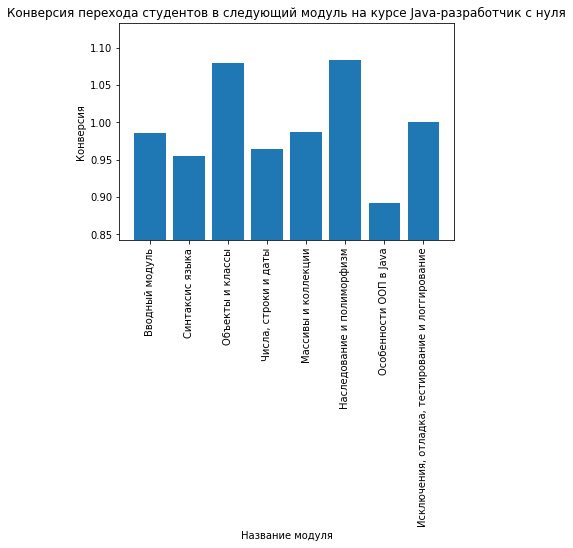

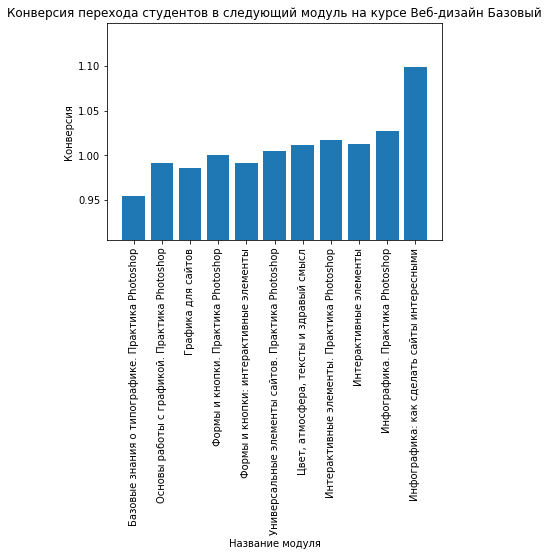

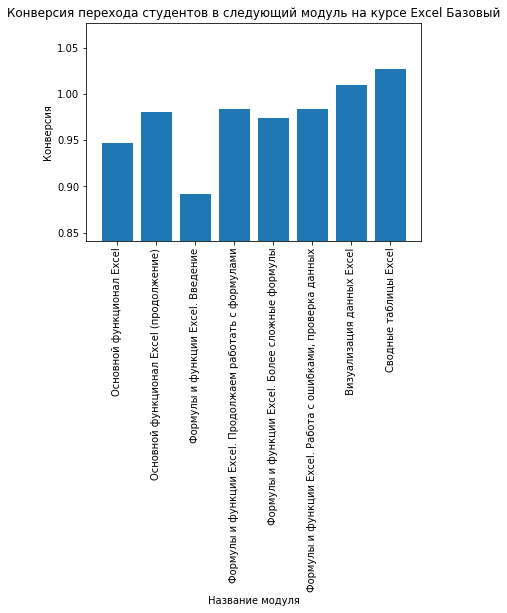

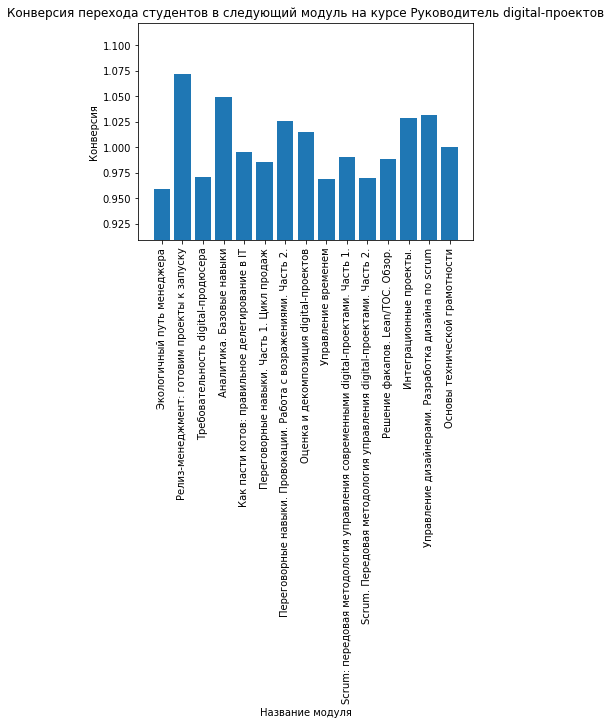

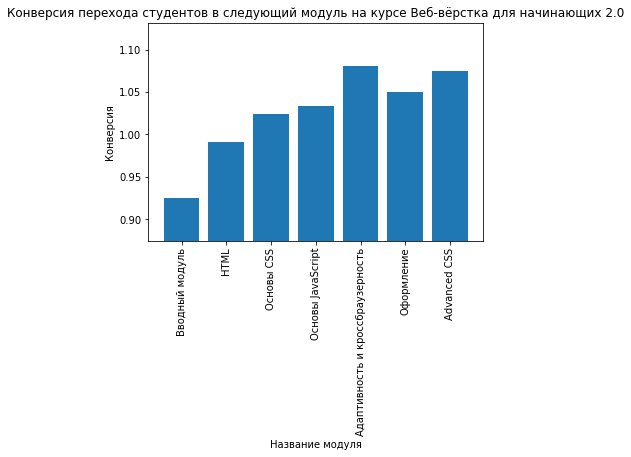

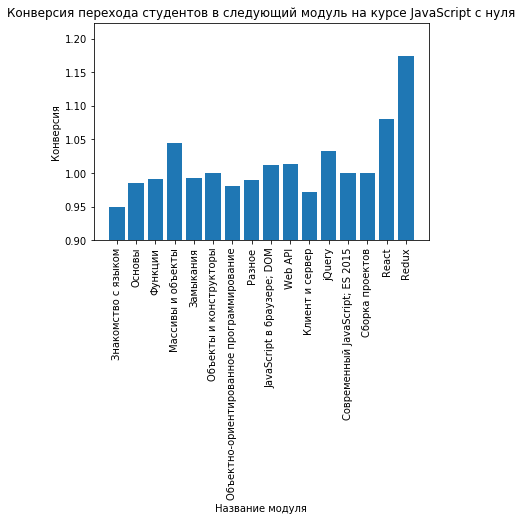

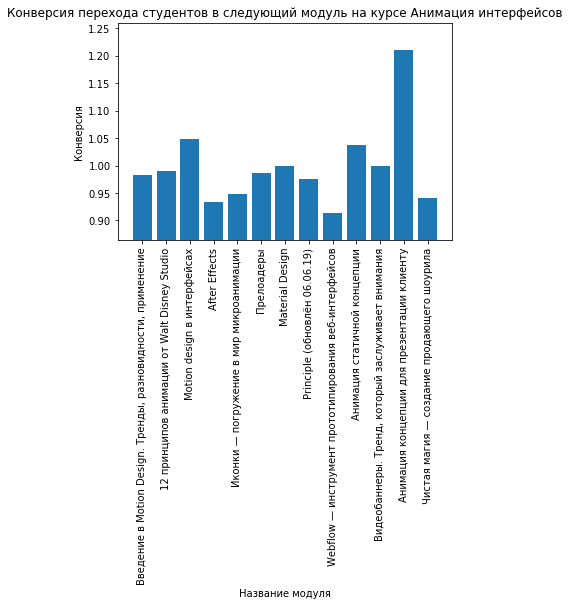

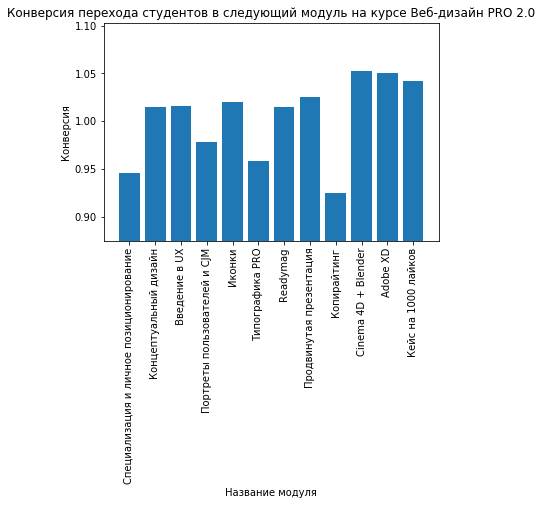

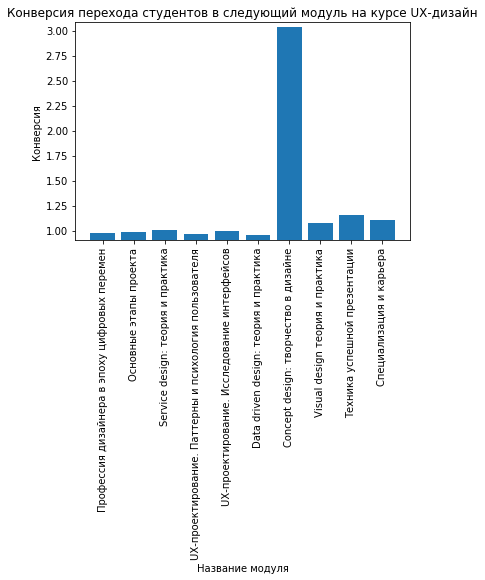

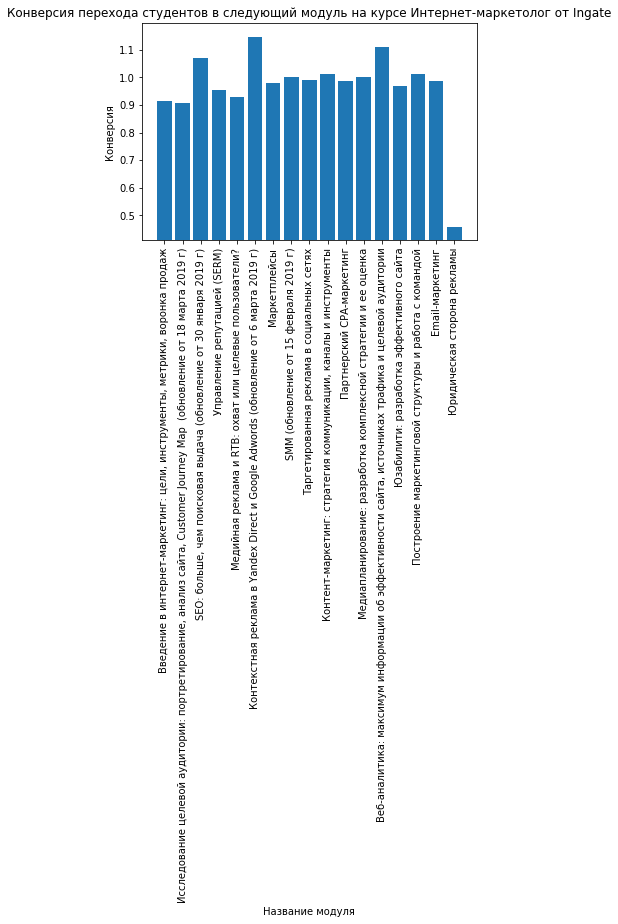

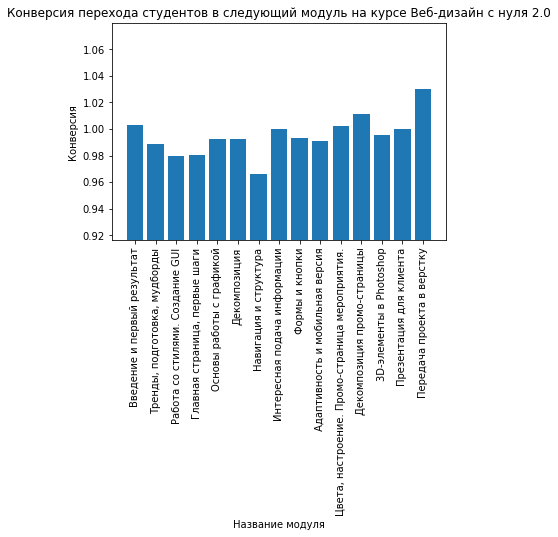

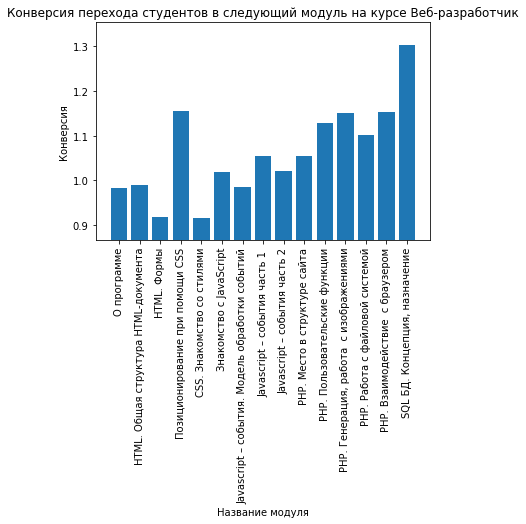

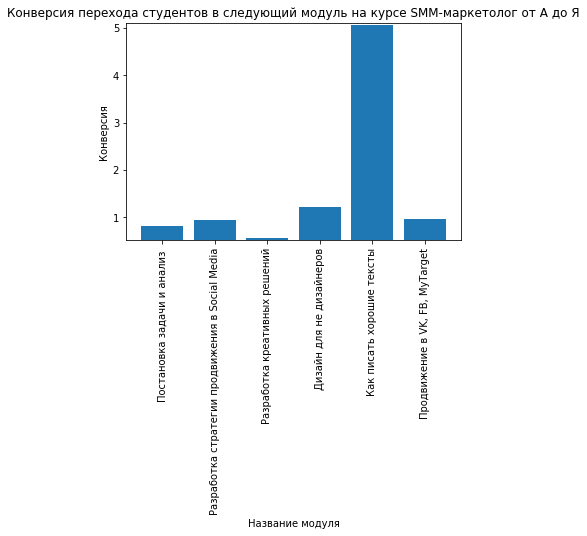

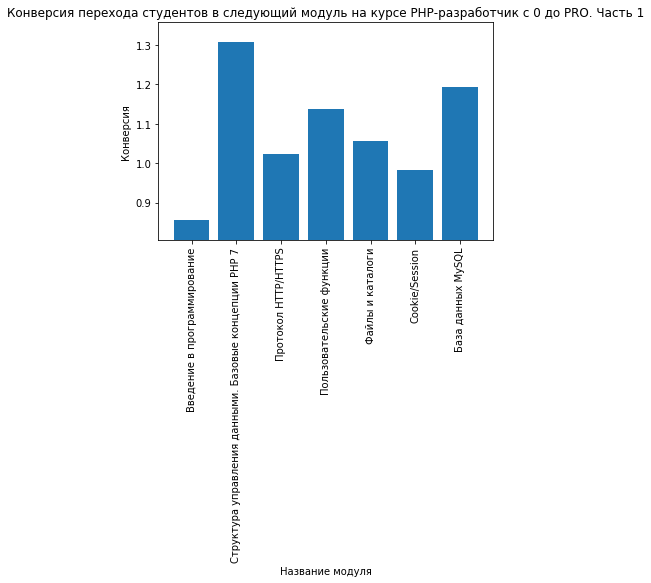

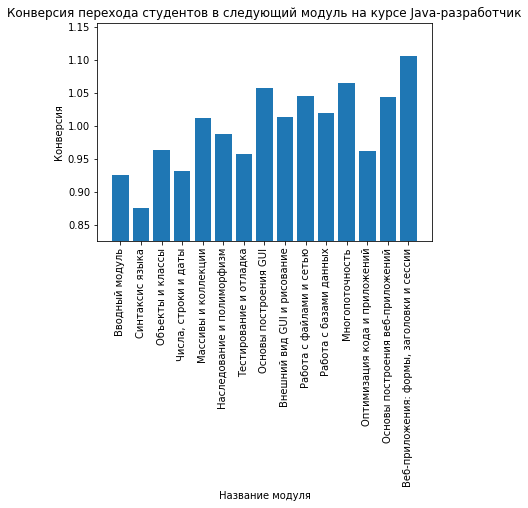

In [76]:
#2.2 В цикле нарисуем 15 графиков по каждому курсу
for n in range (15):
    n1 = str(n)
    name_subplot = 'subplot' + n1
    name_fig = 'fig' + n1
    name_fig, name_subplot = plt.subplots()
    name = names[n]
    # рисуем график, добавляем подписи оси x и заголовок
    name_subplot.bar(df_convertion_bar.loc[
        df_convertion_bar['course_title'] == name, 'module_title'], df_convertion_bar.loc[
        df_convertion_bar['course_title'] == name, 'convertion'])
    plt.xticks(df_convertion_bar.loc[df_convertion_bar['course_title'] == name, 'module_title'], rotation='vertical')
    name_subplot.set_title(f'Конверсия перехода студентов в следующий модуль на курсе {name}')
    name_subplot.set_xlabel('Название модуля')
    name_subplot.set_ylabel('Конверсия')
    y_min = df_convertion_bar.loc[df_convertion_bar['course_title'] == name, 'convertion'].min() - 0.05
    y_max = df_convertion_bar.loc[df_convertion_bar['course_title'] == name, 'convertion'].max() + 0.05
    name_subplot.set_ylim(y_min, y_max)

In [77]:
#3. Построим горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 
#Ticks должны содержать номер и название модуля. 
#Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). 
#Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. 
#У медианы должен быть свой цвет. Рамок у графиков быть не должно
#3.1 Для идентификации сферы деятельности нам понадобиться датафрейм, которым мы пользовались при выполнении первого задания
# Для удобство назначим индексом строк столбец с названием курса
num_of_students_by_course.index = num_of_students_by_course.course_title
num_of_students_by_course

,course_title,course_field,counts,colors
course_title,,,,
SMM-маркетолог от А до Я,SMM-маркетолог от А до Я,Marketing,506,c
Веб-дизайн Базовый,Веб-дизайн Базовый,Design,518,g
Java-разработчик c нуля,Java-разработчик c нуля,Development,581,m
Анимация интерфейсов,Анимация интерфейсов,Design,598,g
Веб-разработчик,Веб-разработчик,Development,628,m
Руководитель digital-проектов,Руководитель digital-проектов,Business,685,b
Java-разработчик,Java-разработчик,Development,763,m
Excel Базовый,Excel Базовый,Business,782,b
PHP-разработчик с 0 до PRO. Часть 1,PHP-разработчик с 0 до PRO. Часть 1,Development,854,m


In [78]:
#3.2 Для графика рассчитаем значения медианы по каждому курсу с помощью группировки
df_convertion_median = df_convertion_bar.groupby('course_title')['convertion'].agg('median')
df_convertion_median

course_title
Excel Базовый                          0.981883
Java-разработчик                       1.011561
Java-разработчик c нуля                0.986266
JavaScript с нуля                      1.000000
PHP-разработчик с 0 до PRO. Часть 1    1.055556
SMM-маркетолог от А до Я               0.958753
UX-дизайн                              0.997466
Анимация интерфейсов                   0.985915
Веб-вёрстка для начинающих 2.0         1.033582
Веб-дизайн PRO 2.0                     1.015388
Веб-дизайн Базовый                     1.004717
Веб-дизайн с нуля 2.0                  0.993322
Веб-разработчик                        1.055556
Интернет-маркетолог от Ingate          0.987805
Руководитель digital-проектов          0.995349
Name: convertion, dtype: float64

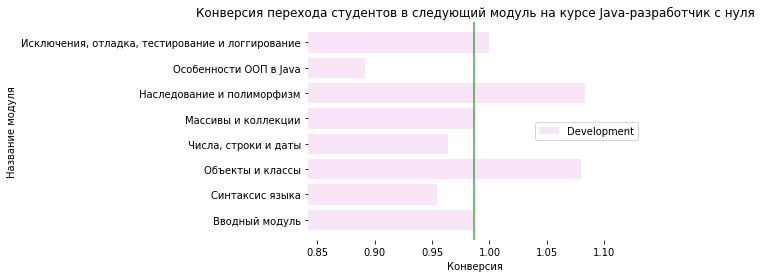

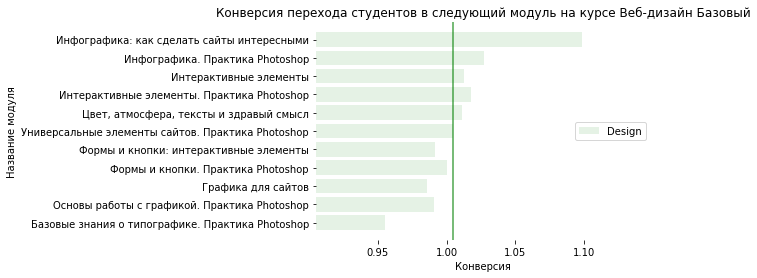

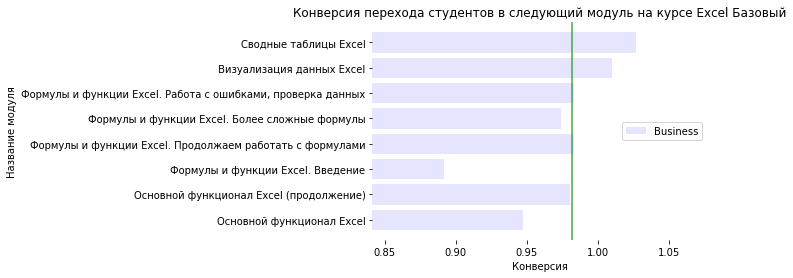

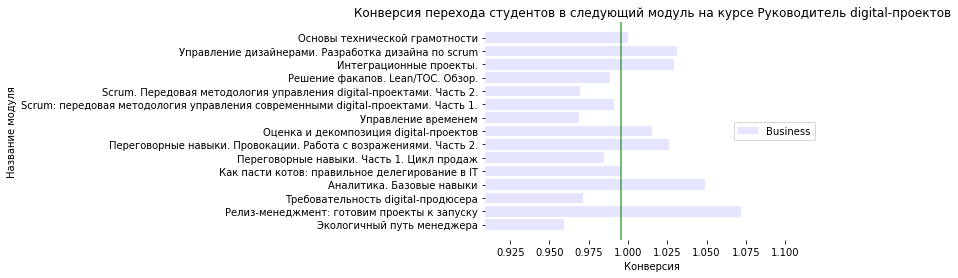

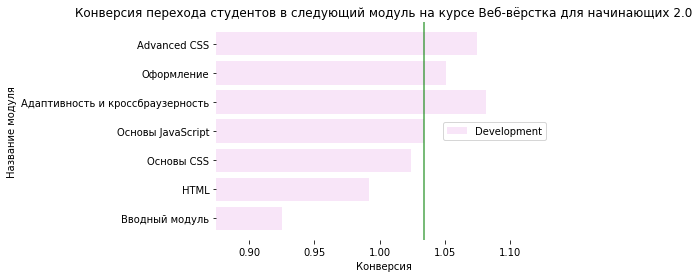

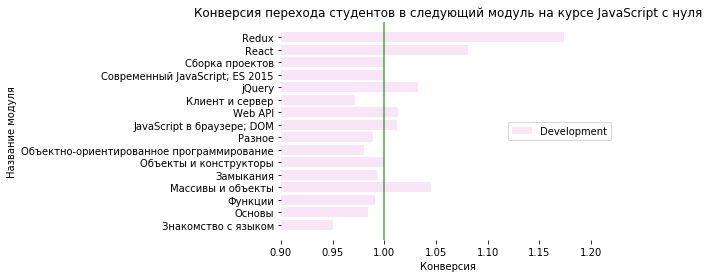

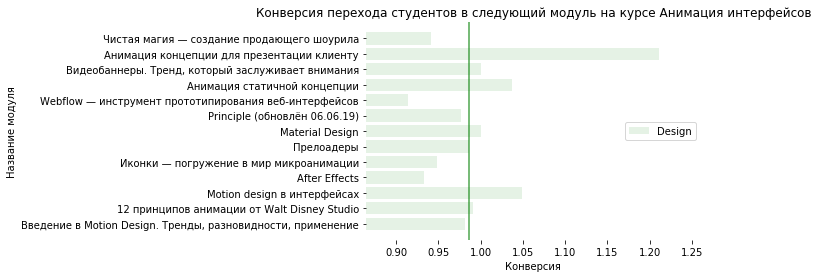

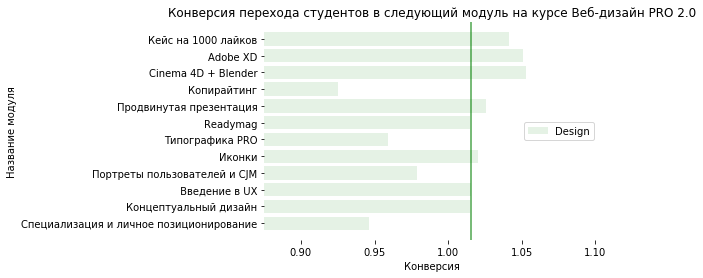

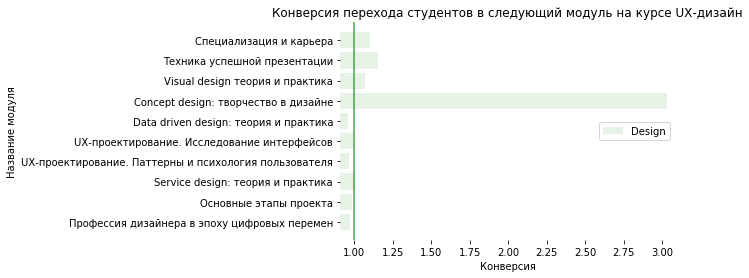

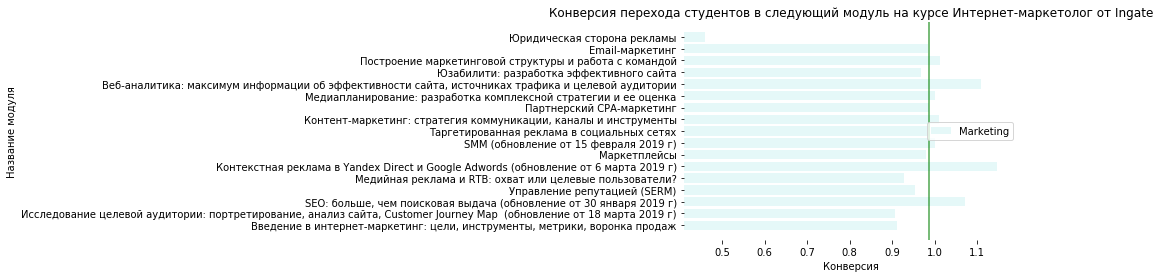

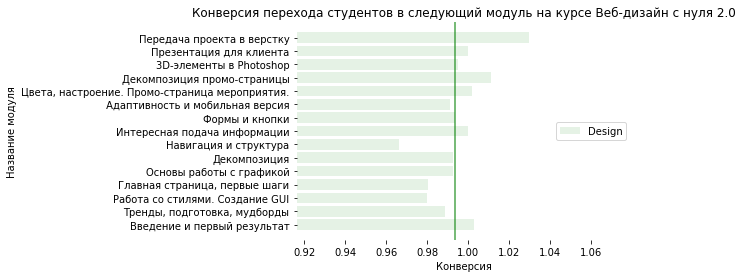

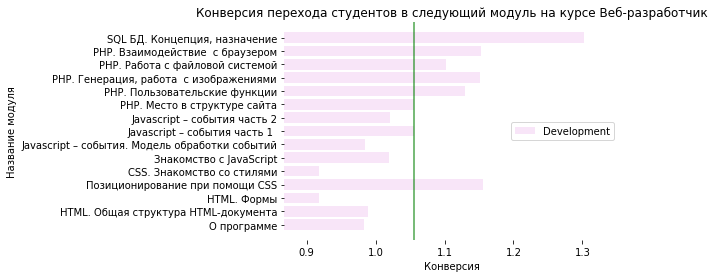

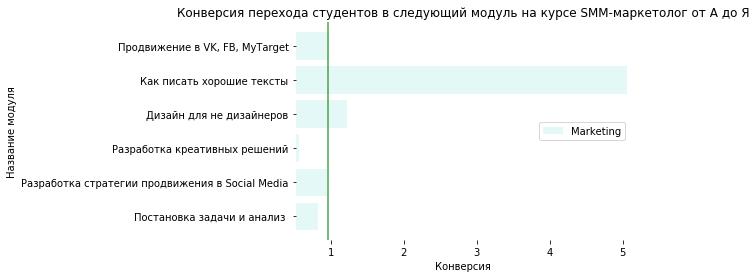

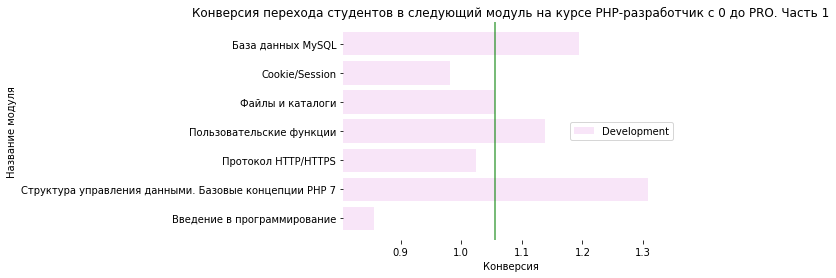

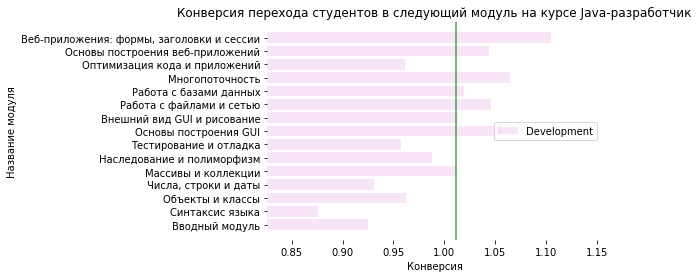

In [79]:
#3.3 Теперь в цикле нарисуем 15 графиков, для этого на каждом этапе цикла создаем новый холст
for n in range (15):
    n1 = str(n)
    name_subplot = 'subplot' + n1
    name_fig = 'fig' + n1
    name_fig, name_subplot = plt.subplots()
    name = names[n] #используем ранее созданный список с названиями курсов
    # рисуем график для каждого курса и лейблы для легенды)
    name_subplot.barh(df_convertion_bar.loc[
        df_convertion_bar['course_title'] == name, 'module_title'], df_convertion_bar.loc[
        df_convertion_bar['course_title'] == name, 'convertion'], color=num_of_students_by_course.loc[
        name, 'colors'], label=num_of_students_by_course.loc[name, 'course_field'], alpha=0.1)
    #добавляем подписи оси y
    plt.yticks(df_convertion_bar.loc[df_convertion_bar['course_title'] == name, 'module_title'])
    #устанавливаем заголовок
    name_subplot.set_title(f'Конверсия перехода студентов в следующий модуль на курсе {name}')
    #устанавливаем названия осей
    name_subplot.set_ylabel('Название модуля')
    name_subplot.set_xlabel('Конверсия')
    #добавляем легенду
    plt.legend(loc="center right")
    #рисуем медиану
    name_subplot.axvline(x=df_convertion_median[name], color='g', alpha=0.7)
    #убираем рамки
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    x_min = df_convertion_bar.loc[df_convertion_bar['course_title'] == name, 'convertion'].min() - 0.05
    x_max = df_convertion_bar.loc[df_convertion_bar['course_title'] == name, 'convertion'].max() + 0.05
    name_subplot.set_xlim(x_min, x_max)

### Выводы:
1. На большинстве курсов медианное значение конверсии переходов студентов из модуля в модуль равно или близко к единице. То есть все студенты, которые сдают задания, приступают к выполнению следующего модуля. Тем не менее, есть некоторые курсы, на которых студенты по каким-то причинам не переходят к следующему модулю. Наиболее низкий показатель медианы конверсии на курсах "SMM-маркетолог от А до Я" (0.959), "Excel Базовый" (0.982), "Анимация интерфейсов" (0.986) и "Java разработчик с нуля" (0.986)

2. На большинстве курсов показатель конверсии увеличивается по мере увеличения номера модуля.
3. Тем не менее, есть некоторые модули, конверсия переходов по которым, значительно ниже медианного уровня, что не связано с номером этого модуля в курсе. Причины низкой конверсии могут быть различные, что требует дополнительного анализа следующих модулей:

 * Курс "Java разработчик с нуля". Модуль "Особенности ООП в Java"
 * Курс "Excel Базовый". Модуль "Формулы и функции в Excel. Введение"
 * Курс "JavaScript с нуля". Модуль "Клиент и сервер"
 * Курс "Анимация интерфейсов". Модуль "Webflow - инструмент прототипирования веб-интерфейса"
 * Курс "Веб-дизайн PRO 2.0". Модуль "Копирайтинг"
 * Курс "Руководитель digital-проектов". Модули "Scrum. Часть 2" и "Управление временем"
 * Курс "Интернет-маркетолог от Ingate". Модуль "Юридическая сторона рекламы"
 * Курс "Веб-дизайн с нуля 2.0". Модуль "Навигация и структура"
 * Курс "Веб-разработчик". Модули "HTML формы" и "CSS. Знакомство со стилями"
 * Курс "SMM-маркетолог от А до Я". Модуль "Разработка креативных решений"
 * Курс "PHP-разработчик с 0 до PRO". Модуль "Cookie/Sesson"
 * Курс "Java-разработчик". Модуль "Оптимизация кода"

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [80]:
# Самая наверное очевидная метрика - это метрика, характеризующая скорость прохождения уроков в модулях. Можно рассчитать 
# средний показатель времени прохождения уроков для каждого студента. Для этого нужно  дату начала прохождения
# урока вычесть из даты завершения этого урока. Затем рассчитать среднюю скорость по всем, пройденным урокам на курсе.
# Чем ниже, будет этот показатель, тем "проблемнее студент".
# 1. Отберем из основного датафрейма строки с прогрессами с выполненными д/з
df_hw_time = df_main_2[(df_main_2['is_homework'] == True) & (df_main_2['status'] == 'done')]

In [81]:
# 2. Создадим столбец с временем прхождения уроков, для этого вычтем из даты завершени урока дату начала его выполнения
# и переведем timedelta в числовой формат в днях
df_hw_time['hw_time'] = (df_hw_time['finish_date'] - df_hw_time['start_date']).dt.days
df_hw_time['hw_time'] = (df_hw_time['finish_date'] - df_hw_time['start_date']).dt.days

# поскольку по каким-то причинам в нашем датасете есть прогресссы, где дата завершения меньше даты начала выполнения
# на несколько секунд, заменим получившееся отрицательное значение (-1), на 0
df_hw_time['hw_time'].where(df_hw_time['hw_time'] > 0, 0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

In [82]:
# 3. Сгруппируем датафрйм по курсу и студенту, агрегируем по времени прохождения урока, рассчитав среднее значение -
# мы получили среднее время прохождения уроков студентов на каждом курсе
df_hw_time_by_students = df_hw_time.groupby(['course_title', 'student_id'])['hw_time'].agg('median').reset_index(
    name='mean_hw_time').sort_values(['course_title', 'mean_hw_time'])
df_hw_time_by_students.tail()

,course_title,student_id,mean_hw_time
8883,Руководитель digital-проектов,b5e91170346821d9c3cf06cbdc7c6152,145.5
8781,Руководитель digital-проектов,8b693afe078c21b81116eeab87163529,153.0
8716,Руководитель digital-проектов,645629052b77b1f8da2265cd0b80fd9e,160.0
8741,Руководитель digital-проектов,7931e8decbc23d3915c81d4b6c7b0beb,183.0
8514,Руководитель digital-проектов,0aa309f5f5bb0a56017c7bfcd0cefbc8,245.0


In [83]:
# 4. Рассчитаем значение квантиля 10% самых больших значения среднего времени прохождения уроков и переведем в массив
df_hw_time_by_courses = df_hw_time.groupby(['course_title'])['hw_time'].agg('quantile', 0.9).reset_index(
    name='mean_hw_time')
quantile_hw_time_by_course = df_hw_time_by_courses.to_numpy()
quantile_hw_time_by_course

array([['Excel Базовый', 14.0],
       ['Java-разработчик', 40.0],
       ['Java-разработчик c нуля', 12.0],
       ['JavaScript с нуля', 31.0],
       ['PHP-разработчик с 0 до PRO. Часть 1', 63.0],
       ['SMM-маркетолог от А до Я', 32.0],
       ['UX-дизайн', 60.0],
       ['Анимация интерфейсов', 52.799999999999955],
       ['Веб-вёрстка для начинающих 2.0', 49.0],
       ['Веб-дизайн PRO 2.0', 46.80000000000018],
       ['Веб-дизайн Базовый', 46.0],
       ['Веб-дизайн с нуля 2.0', 25.0],
       ['Веб-разработчик', 34.100000000000136],
       ['Интернет-маркетолог от Ingate', 37.0],
       ['Руководитель digital-проектов', 40.0]], dtype=object)

In [84]:
# 5. Теперьв цикле по каждому курсу найдем студентов, среднее время прохождения уроков которыми, больше 10% квантиля
for n in range(14):
    print(df_hw_time_by_students[(df_hw_time_by_students['course_title'] == quantile_hw_time_by_course[n][0]) & (
              df_hw_time_by_students['mean_hw_time'] > quantile_hw_time_by_course[n][1])])

      course_title                        student_id  mean_hw_time
160  Excel Базовый  572fa829e42d645b7903fb3e26ae861d          16.0
408  Excel Базовый  e401e94566ce766ab81e8172914e952b          16.0
226  Excel Базовый  7e599a850fe3285bb6388f57c74e0d19          17.0
321  Excel Базовый  b76a79c4874b537079942dded03566fd          17.0
11   Excel Базовый  03e87d6358a7d28ca41e63d1c17bc256          17.5
59   Excel Базовый  1ea1933f8f8ef2fe8fbc627c98d327c1          17.5
337  Excel Базовый  be4abbfadabc49d64ae5f5c7cc637aa0          22.0
346  Excel Базовый  c3bc714f75420e22164654f754f1b354          22.5
26   Excel Базовый  0c07742f8af4ecb6421245d3e9c43bae          27.0
363  Excel Базовый  cd239d1a031c14fc8c60a76d2edf0fd0          29.0
247  Excel Базовый  8923d1efd9265559dcb71e8689d1441e          35.0
70   Excel Базовый  23c2a785bcdf33eef4879128f12547f5          36.0
166  Excel Базовый  58982b4f04ebe21c46347a1e8ebd8321          36.0
367  Excel Базовый  cfe740160aeb3e1fa78153b354212c17          

Таким образом мы получили id студентов, которые тратят больше времени на прохождение уроков, чем другие студенты на том же курсе. 